### # 241,010,102       : 기저귀

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import seaborn as sns

In [2]:
import os
os.getcwd()

'/Users/we/Downloads/업무/buy it again_분석 '

./chunk/

---

## # 3개월 데이터 사용

In [3]:
diaper_train = pd.read_excel('diaper_train_3.xlsx')
diaper_test = pd.read_excel('diaper_test.xlsx')

In [184]:
diaper_train.shape

(282195, 7)

In [185]:
diaper_train.m_id.nunique()

145604

---

In [222]:
tt = pd.read_csv('diaper_3_t.csv')

In [223]:
tt = tt.iloc[:,-1:]

In [224]:
tt.head()

,0
0,NaN
1,9.0
2,24.0
3,26.0
4,NaN


In [225]:
tt = tt.dropna()

In [226]:
tt.columns = ['time']

In [227]:
tt_drop0 = tt[tt.time != 0]

In [228]:
tt_drop0.head()

,time
1,9.0
2,24.0
3,26.0
6,59.0
7,11.0


In [229]:
tt.shape

(136591, 1)

In [230]:
tt_drop0.time.value_counts()

14.0    3258
13.0    3170
15.0    2949
17.0    2864
20.0    2861
18.0    2855
21.0    2845
12.0    2791
19.0    2787
16.0    2779
1.0     2757
27.0    2545
11.0    2539
23.0    2527
22.0    2515
10.0    2462
24.0    2431
25.0    2350
26.0    2317
28.0    2207
9.0     2206
2.0     2186
8.0     2185
7.0     2094
6.0     2031
29.0    2001
30.0    1964
3.0     1943
31.0    1915
4.0     1893
        ... 
57.0     308
63.0     288
64.0     277
65.0     252
66.0     210
68.0     204
67.0     189
73.0     181
69.0     180
70.0     157
72.0     141
71.0     134
74.0     112
75.0     108
76.0     104
77.0      81
79.0      61
80.0      55
78.0      52
81.0      51
82.0      48
83.0      40
84.0      33
85.0      31
87.0      20
89.0      17
86.0      16
88.0      16
90.0       8
91.0       3
Name: time, Length: 91, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1afcf080>]],
      dtype=object)

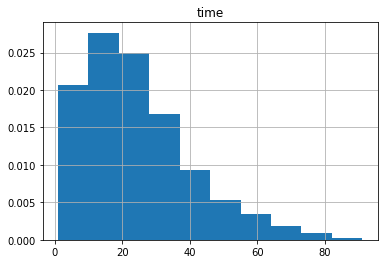

In [231]:
tt_drop0.hist( density = True)

In [27]:
tt_drop0.mean()

time    23.843441
dtype: float64

---

---

## * lambda라는 개념을 다시 잡기.
poisson(lambda) : 이때의 lambda는 단위시간 당 사건의 평균적인 발생 횟수. - 이를 추정하기 위해, 단위 시간 당 사건의 발생횟수의 분포를 본다.


## # 1/time 을 감마 피팅 하자.
: time들의 분포를 알고있다 -> 단위 시간 당, 사건의 발생횟수를 맞춰줄 수 있다. 예를 들어, user들로부터 t=(3일,4일,5일,6일)이라는 time-interval을 얻게 되었다고 하자.

 이때, 단위 시간 당 사건의 발생 횟수 X=(1/3, 1/4, 1/5, 1/6)이고, 이 분포를 이용해 poisson(lambda)를 추정하는 것이다.

In [232]:
tt_drop0.mean()

time    23.843441
dtype: float64

In [233]:
# tt_drop0의 inverse를 사용할 것이다.

tt_inver = 1/tt_drop0

In [234]:
tt_inver

,time
1,0.111111
2,0.041667
3,0.038462
6,0.016949
7,0.090909
9,0.076923
12,0.041667
16,0.032258
17,0.034483
18,0.058824


In [235]:
tt_inver.mean()

time    0.099993
dtype: float64

In [236]:
1/tt_inver.mean()

time    10.000696
dtype: float64

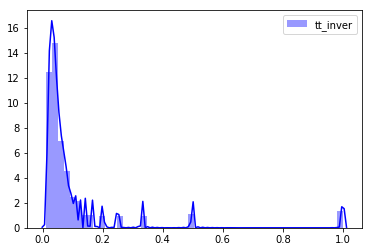

In [35]:
# tt_inver 의 분포를 살펴보는거야

plt.figure()
sns.distplot( tt_inver, color = 'blue', label='tt_inver')
plt.legend()
#plt.xlim(-3,55)

plt.show()
plt.close()

---

### # (1) gamma.fit으로 parameters 추정해볼게.

### # 1주일 단위로

In [39]:
tt_drop0.head()

,time
1,9.0
2,24.0
3,26.0
6,59.0
7,11.0


In [40]:
tt_scal = tt_drop0/7

In [41]:
tt_scal.head()

,time
1,1.285714
2,3.428571
3,3.714286
6,8.428571
7,1.571429


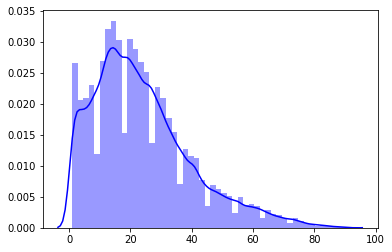

In [45]:
plt.figure()
sns.distplot(tt_drop0, color = 'blue')
#plt.legend()
#plt.xlim(-3,55)

plt.show()
plt.close()

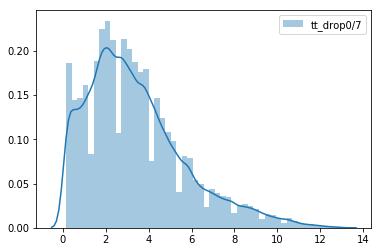

In [50]:
plt.figure()
sns.distplot(tt_scal, label='tt_drop0/7')
plt.legend()
#plt.xlim(-3,55)

plt.show()
plt.close()

In [52]:
inver_scal = 1/tt_scal

<Figure size 432x288 with 0 Axes>

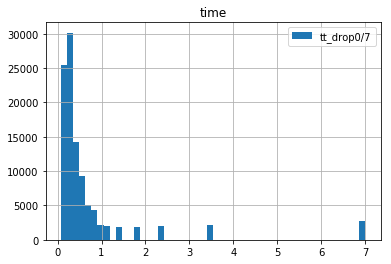

In [56]:
plt.figure()
inver_scal.hist(bins=50,label='tt_drop0/7')
plt.legend()
#plt.xlim(-3,55)

plt.show()
plt.close()

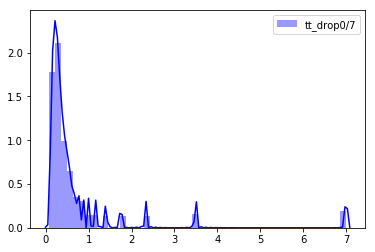

In [47]:
plt.figure()
sns.distplot(1/tt_scal, color = 'blue', label='tt_drop0/7')
plt.legend()
#plt.xlim(-3,55)

plt.show()
plt.close()

In [36]:
# 1주윌 단위로 계산 -> 하루 단위에서 7배 해주면 되지.

tt_inver7 = tt_inver*7

In [57]:
# 밑의 tt_inver7 과 같은결과라는 것을 알려줘

inver_scal.time.value_counts()

0.500000    3258
0.538462    3170
0.466667    2949
0.411765    2864
0.350000    2861
0.388889    2855
0.333333    2845
0.583333    2791
0.368421    2787
0.437500    2779
7.000000    2757
0.259259    2545
0.636364    2539
0.304348    2527
0.318182    2515
0.700000    2462
0.291667    2431
0.280000    2350
0.269231    2317
0.250000    2207
0.777778    2206
3.500000    2186
0.875000    2185
1.000000    2094
1.166667    2031
0.241379    2001
0.233333    1964
2.333333    1943
0.225806    1915
1.750000    1893
            ... 
0.122807     308
0.111111     288
0.109375     277
0.107692     252
0.106061     210
0.102941     204
0.104478     189
0.095890     181
0.101449     180
0.100000     157
0.097222     141
0.098592     134
0.094595     112
0.093333     108
0.092105     104
0.090909      81
0.088608      61
0.087500      55
0.089744      52
0.086420      51
0.085366      48
0.084337      40
0.083333      33
0.082353      31
0.080460      20
0.078652      17
0.081395      16
0.079545      

In [37]:
tt_inver7.time.value_counts()

0.500000    3258
0.538462    3170
0.466667    2949
0.411765    2864
0.350000    2861
0.388889    2855
0.333333    2845
0.583333    2791
0.368421    2787
0.437500    2779
7.000000    2757
0.259259    2545
0.636364    2539
0.304348    2527
0.318182    2515
0.700000    2462
0.291667    2431
0.280000    2350
0.269231    2317
0.250000    2207
0.777778    2206
3.500000    2186
0.875000    2185
1.000000    2094
1.166667    2031
0.241379    2001
0.233333    1964
2.333333    1943
0.225806    1915
1.750000    1893
            ... 
0.122807     308
0.111111     288
0.109375     277
0.107692     252
0.106061     210
0.102941     204
0.104478     189
0.095890     181
0.101449     180
0.100000     157
0.097222     141
0.098592     134
0.094595     112
0.093333     108
0.092105     104
0.090909      81
0.088608      61
0.087500      55
0.089744      52
0.086420      51
0.085366      48
0.084337      40
0.083333      33
0.082353      31
0.080460      20
0.078652      17
0.079545      16
0.081395      

In [95]:
print(tt_inver.shape[0], sum(tt_inver7.time == 7.0)  )  # 10만개중에, 약 2757개가 time-interval=1이야

# tt_invr7 == 7 이라는 의미는, 1주일 단위에 구매가 '7번'일어나는 사람들의 frequency를 보여주는거야!(사실은, 하루에 한번 산 사람들!) 

103169 2757


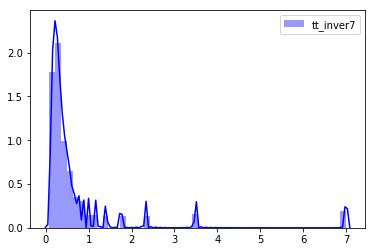

In [96]:
plt.figure()
sns.distplot(tt_inver7, color = 'blue', label='tt_inver7')
plt.legend()
#plt.xlim(-3,55)

plt.show()
plt.close()

---

In [75]:
tt_scal

,time
1,1.285714
2,3.428571
3,3.714286
6,8.428571
7,1.571429
9,1.857143
12,3.428571
16,4.428571
17,4.142857
18,2.428571


### # 여기서는 inver_scal을 이용할게 (time : tt_scal)

In [237]:
alpha_, _ , scale_ = stats.gamma.fit(tt_inver, floc=0) 

In [238]:
alpha_, scale_  # inver_scal의 fitting값

(1.0141222476315481, 0.09860058125697305)

In [183]:
1/scale_

1.4488468631318532

In [220]:
1/(alpha_*scale_)   # inver_scal.mean() == alpha_*scale_

1.4286708200274592

In [76]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(train, test, test_id, current, alpha, beta, tmean):
    t_ = (current - train[train.m_id == test_id].iloc[-1].biz_dt).days/7  # 구매이력이 없는사람은?(고려해야해) - 지금은 있는 사람만.
    t_purch = (train[train.m_id == test_id].iloc[-1].biz_dt - train[train.m_id == test_id].iloc[0].biz_dt).days/7
    k = train.biz_dt[train.m_id == test_id].shape[0] # train 구매이력
    if (k <= 1) or (train.biz_dt[train.m_id == test_id].diff().mean().days/7 == 0) :# if구매이력이 1회 이하 or user_mean=0
        tmean_u = tmean # tmean : 모든 user들의 상품에대한 평균 t(구매이력이 한번밖에 없으니, user의 고유 평균 t값 대입할 수 없다.)
    else:
        tmean_u = train.biz_dt[train.m_id == test_id].diff().mean().days/7
    lamb = (k+alpha)/(t_purch+2*abs(tmean_u-t_)+beta)
    return lamb, t_, t_purch, tmean_u, k

---

---

# #(Test) - evaluation metric (1)

### # 8월 8일부터 해보자! (8월 8일~10일)

In [64]:
diaper_test[diaper_test.biz_dt.dt.date == pd.to_datetime('2018-08-08').date()].shape

# 8월 8일자의 거래규모

(4023, 7)

In [65]:
diaper_test[diaper_test.biz_dt.dt.date == pd.to_datetime('2018-08-08').date()].m_id.nunique()

# 8월 8일 일자의, unique한 구매자는 3592명

3592

In [66]:
test_id_ = diaper_test[diaper_test.biz_dt.dt.date == pd.to_datetime('2018-08-08').date()].m_id.unique()

In [67]:
len(test_id_)

3592

In [68]:
# test_id 중에서, train기록 가지고있는 애들만 활용해본다!

tf = []
for i in range(len(test_id_)):
    tf.append( bool(diaper_train[diaper_train.m_id == test_id_[i]].shape[0]) 
              & bool(diaper_test[diaper_test.m_id == test_id_[i]].shape[0]) == True) #train, test 둘다 있는 아이디를 밝혀주는 index만들어주는거야.

In [69]:
len(test_id_[tf])

# 3592명중 train data에서도 구매해온 고객은 2281명

2281

In [70]:
test_id_ = test_id_[tf]

### # 8월 2일~ 8월 14일 (**실 구매 : 8월 8일)

In [80]:
current = pd.date_range(start = '2018-08-08', end = '2018-08-31')

In [81]:
current

DatetimeIndex(['2018-08-08', '2018-08-09', '2018-08-10', '2018-08-11',
               '2018-08-12', '2018-08-13', '2018-08-14', '2018-08-15',
               '2018-08-16', '2018-08-17', '2018-08-18', '2018-08-19',
               '2018-08-20', '2018-08-21', '2018-08-22', '2018-08-23',
               '2018-08-24', '2018-08-25', '2018-08-26', '2018-08-27',
               '2018-08-28', '2018-08-29', '2018-08-30', '2018-08-31'],
              dtype='datetime64[ns]', freq='D')

In [12]:
for i in range(len(current)):
    current_week = pd.date_range(start = current[i]-6, end = current[i]+6).tolist()

In [13]:
current_week

[Timestamp('2018-08-25 00:00:00', freq='D'),
 Timestamp('2018-08-26 00:00:00', freq='D'),
 Timestamp('2018-08-27 00:00:00', freq='D'),
 Timestamp('2018-08-28 00:00:00', freq='D'),
 Timestamp('2018-08-29 00:00:00', freq='D'),
 Timestamp('2018-08-30 00:00:00', freq='D'),
 Timestamp('2018-08-31 00:00:00', freq='D'),
 Timestamp('2018-09-01 00:00:00', freq='D'),
 Timestamp('2018-09-02 00:00:00', freq='D'),
 Timestamp('2018-09-03 00:00:00', freq='D'),
 Timestamp('2018-09-04 00:00:00', freq='D'),
 Timestamp('2018-09-05 00:00:00', freq='D'),
 Timestamp('2018-09-06 00:00:00', freq='D')]

---

In [71]:
current_week = pd.date_range('2018-08-02', periods=13).tolist()

In [72]:
current_week

[Timestamp('2018-08-02 00:00:00', freq='D'),
 Timestamp('2018-08-03 00:00:00', freq='D'),
 Timestamp('2018-08-04 00:00:00', freq='D'),
 Timestamp('2018-08-05 00:00:00', freq='D'),
 Timestamp('2018-08-06 00:00:00', freq='D'),
 Timestamp('2018-08-07 00:00:00', freq='D'),
 Timestamp('2018-08-08 00:00:00', freq='D'),
 Timestamp('2018-08-09 00:00:00', freq='D'),
 Timestamp('2018-08-10 00:00:00', freq='D'),
 Timestamp('2018-08-11 00:00:00', freq='D'),
 Timestamp('2018-08-12 00:00:00', freq='D'),
 Timestamp('2018-08-13 00:00:00', freq='D'),
 Timestamp('2018-08-14 00:00:00', freq='D')]

In [78]:
d = {}

for j in range(len(test_id_)):   # "test_id_"(8워 8일 구매자) 를 이용해, 결과 살펴보겠다!
    d[j] = []
    for i in range(len(current_week)):     ## 8월8일 기준 +- 6일!
        lamb, t_, t_purch, tmean_u, k = func_lamb(train = diaper_train, test = diaper_test, test_id=test_id_[j], 
                  alpha = alpha_ , beta=1/scale_ , tmean = tt_drop0.mean().item()/7 , current = current_week[i])
        
        if i == 0:
            print('user:[{}]'.format(j),'last order:', diaper_train.biz_dt[diaper_train.m_id == test_id_[j]][-1:], '\n')
        print('current:',current_week[i], 'current-last_order:', t_ , 't_purch:', t_purch)  
        print('pred:',(1-stats.poisson.pmf(mu = lamb, k=0)),', tmean_u:',tmean_u,', k:',k ,'\n')
        d[j].append( (1-stats.poisson.pmf(mu = lamb, k=0)) )
    print('------------------------------------------------------------------------')
    print('\n')

user:[0] last order: 7599153   2018-05-05 23:55:48
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-02 00:00:00 current-last_order: 12.571428571428571 t_purch: 0.0
pred: 0.09681677977861303 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-03 00:00:00 current-last_order: 12.714285714285714 t_purch: 0.0
pred: 0.09550621499566758 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-04 00:00:00 current-last_order: 12.857142857142858 t_purch: 0.0
pred: 0.09423062728085063 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-05 00:00:00 current-last_order: 13.0 t_purch: 0.0
pred: 0.09298863606013819 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-06 00:00:00 current-last_order: 13.142857142857142 t_purch: 0.0
pred: 0.09177893240767332 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-07 00:00:00 current-last_order: 13.285714285714286 t_purch: 0.0
pred: 0.09060027446162289 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-08 00:00:00 current-last_order: 13.428

user:[4] last order: 1548063   2018-07-16 00:26:37
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-02 00:00:00 current-last_order: 2.2857142857142856 t_purch: 9.857142857142858
pred: 0.4920887036906302 , tmean_u: 1.2857142857142858 , k: 8 

current: 2018-08-03 00:00:00 current-last_order: 2.4285714285714284 t_purch: 9.857142857142858
pred: 0.48480389419340175 , tmean_u: 1.2857142857142858 , k: 8 

current: 2018-08-04 00:00:00 current-last_order: 2.5714285714285716 t_purch: 9.857142857142858
pred: 0.47772095074608445 , tmean_u: 1.2857142857142858 , k: 8 

current: 2018-08-05 00:00:00 current-last_order: 2.7142857142857144 t_purch: 9.857142857142858
pred: 0.47083223124675344 , tmean_u: 1.2857142857142858 , k: 8 

current: 2018-08-06 00:00:00 current-last_order: 2.857142857142857 t_purch: 9.857142857142858
pred: 0.46413042297313656 , tmean_u: 1.2857142857142858 , k: 8 

current: 2018-08-07 00:00:00 current-last_order: 3.0 t_purch: 9.857142857142858
pred: 0.4576085305685401 , tmean_

current: 2018-08-13 00:00:00 current-last_order: 1.8571428571428572 t_purch: 10.714285714285714
pred: 0.49958336220322597 , tmean_u: 1.4285714285714286 , k: 8 

current: 2018-08-14 00:00:00 current-last_order: 2.0 t_purch: 10.714285714285714
pred: 0.4920887036906303 , tmean_u: 1.4285714285714286 , k: 8 

------------------------------------------------------------------------


user:[8] last order: 5731080   2018-07-24 11:54:35
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-02 00:00:00 current-last_order: 1.1428571428571428 t_purch: 6.857142857142857
pred: 0.2678119768271622 , tmean_u: 3.4285714285714284 , k: 3 

current: 2018-08-03 00:00:00 current-last_order: 1.2857142857142858 t_purch: 6.857142857142857
pred: 0.27297253721941683 , tmean_u: 3.4285714285714284 , k: 3 

current: 2018-08-04 00:00:00 current-last_order: 1.4285714285714286 t_purch: 6.857142857142857
pred: 0.27833378749821847 , tmean_u: 3.4285714285714284 , k: 3 

current: 2018-08-05 00:00:00 current-last_order: 1.

current: 2018-08-13 00:00:00 current-last_order: 2.5714285714285716 t_purch: 9.857142857142858
pred: 0.42350821343245637 , tmean_u: 1.8571428571428572 , k: 6 

current: 2018-08-14 00:00:00 current-last_order: 2.7142857142857144 t_purch: 9.857142857142858
pred: 0.4164981579859267 , tmean_u: 1.8571428571428572 , k: 6 

------------------------------------------------------------------------


user:[12] last order: 3718487   2018-06-07 23:30:36
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-02 00:00:00 current-last_order: 7.857142857142857 t_purch: 0.0
pred: 0.17682596164926334 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-03 00:00:00 current-last_order: 8.0 t_purch: 0.0
pred: 0.17251198011803903 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-04 00:00:00 current-last_order: 8.142857142857142 t_purch: 0.0
pred: 0.168402835929352 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-05 00:00:00 current-last_order: 8.285714285714286 t_purch: 0.0
pred: 0.164484325248

current: 2018-08-13 00:00:00 current-last_order: 2.142857142857143 t_purch: 0.0
pred: 0.3974761542148655 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-14 00:00:00 current-last_order: 2.2857142857142856 t_purch: 0.0
pred: 0.42065534528681425 , tmean_u: 3.406205906259217 , k: 1 

------------------------------------------------------------------------


user:[16] last order: 8824925   2018-07-31 12:05:44
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-02 00:00:00 current-last_order: 0.14285714285714285 t_purch: 0.0
pred: 0.2231727440099286 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-03 00:00:00 current-last_order: 0.2857142857142857 t_purch: 0.0
pred: 0.23042760777063698 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-04 00:00:00 current-last_order: 0.42857142857142855 t_purch: 0.0
pred: 0.238166600283659 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-05 00:00:00 current-last_order: 0.5714285714285714 t_purch: 0.0
pred: 0.24643941590970841 , tmea

user:[20] last order: 2164886   2018-07-17 01:40:20
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-02 00:00:00 current-last_order: 2.142857142857143 t_purch: 5.571428571428571
pred: 0.19522792673969447 , tmean_u: 5.571428571428571 , k: 2 

current: 2018-08-03 00:00:00 current-last_order: 2.2857142857142856 t_purch: 5.571428571428571
pred: 0.19889392344275791 , tmean_u: 5.571428571428571 , k: 2 

current: 2018-08-04 00:00:00 current-last_order: 2.4285714285714284 t_purch: 5.571428571428571
pred: 0.2026995673556522 , tmean_u: 5.571428571428571 , k: 2 

current: 2018-08-05 00:00:00 current-last_order: 2.5714285714285716 t_purch: 5.571428571428571
pred: 0.20665294695227554 , tmean_u: 5.571428571428571 , k: 2 

current: 2018-08-06 00:00:00 current-last_order: 2.7142857142857144 t_purch: 5.571428571428571
pred: 0.2107627833711695 , tmean_u: 5.571428571428571 , k: 2 

current: 2018-08-07 00:00:00 current-last_order: 2.857142857142857 t_purch: 5.571428571428571
pred: 0.2150384929897967

current: 2018-08-14 00:00:00 current-last_order: 1.8571428571428572 t_purch: 12.857142857142858
pred: 0.4164802298698168 , tmean_u: 2.142857142857143 , k: 7 

------------------------------------------------------------------------


user:[24] last order: 8067379   2018-07-29 20:24:26
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-02 00:00:00 current-last_order: 0.42857142857142855 t_purch: 0.5714285714285714
pred: 0.7293919977317944 , tmean_u: 0.5714285714285714 , k: 2 

current: 2018-08-03 00:00:00 current-last_order: 0.5714285714285714 t_purch: 0.5714285714285714
pred: 0.7750633102930342 , tmean_u: 0.5714285714285714 , k: 2 

current: 2018-08-04 00:00:00 current-last_order: 0.7142857142857143 t_purch: 0.5714285714285714
pred: 0.7293919977317944 , tmean_u: 0.5714285714285714 , k: 2 

current: 2018-08-05 00:00:00 current-last_order: 0.8571428571428571 t_purch: 0.5714285714285714
pred: 0.6874493094356301 , tmean_u: 0.5714285714285714 , k: 2 

current: 2018-08-06 00:00:00 curren

user:[28] last order: 2641567   2018-07-17 22:42:55
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-02 00:00:00 current-last_order: 2.142857142857143 t_purch: 0.0
pred: 0.3974761542148655 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-03 00:00:00 current-last_order: 2.2857142857142856 t_purch: 0.0
pred: 0.42065534528681425 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-04 00:00:00 current-last_order: 2.4285714285714284 t_purch: 0.0
pred: 0.44659913910815885 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-05 00:00:00 current-last_order: 2.5714285714285716 t_purch: 0.0
pred: 0.4758004817645197 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-06 00:00:00 current-last_order: 2.7142857142857144 t_purch: 0.0
pred: 0.5088613518129588 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-07 00:00:00 current-last_order: 2.857142857142857 t_purch: 0.0
pred: 0.546513867508077 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-08 00:00:00 current-last_order

current: 2018-08-03 00:00:00 current-last_order: 4.571428571428571 t_purch: 4.142857142857143
pred: 0.37336392851541456 , tmean_u: 4.142857142857143 , k: 2 

current: 2018-08-04 00:00:00 current-last_order: 4.714285714285714 t_purch: 4.142857142857143
pred: 0.3608143315554254 , tmean_u: 4.142857142857143 , k: 2 

current: 2018-08-05 00:00:00 current-last_order: 4.857142857142857 t_purch: 4.142857142857143
pred: 0.34906487614561643 , tmean_u: 4.142857142857143 , k: 2 

current: 2018-08-06 00:00:00 current-last_order: 5.0 t_purch: 4.142857142857143
pred: 0.338043180999818 , tmean_u: 4.142857142857143 , k: 2 

current: 2018-08-07 00:00:00 current-last_order: 5.142857142857143 t_purch: 4.142857142857143
pred: 0.32768508191970047 , tmean_u: 4.142857142857143 , k: 2 

current: 2018-08-08 00:00:00 current-last_order: 5.285714285714286 t_purch: 4.142857142857143
pred: 0.31793354394713746 , tmean_u: 4.142857142857143 , k: 2 

current: 2018-08-09 00:00:00 current-last_order: 5.428571428571429 t_

current: 2018-08-03 00:00:00 current-last_order: 1.4285714285714286 t_purch: 8.714285714285714
pred: 0.11472657914758333 , tmean_u: 8.714285714285714 , k: 2 

current: 2018-08-04 00:00:00 current-last_order: 1.5714285714285714 t_purch: 8.714285714285714
pred: 0.11598637002311207 , tmean_u: 8.714285714285714 , k: 2 

current: 2018-08-05 00:00:00 current-last_order: 1.7142857142857142 t_purch: 8.714285714285714
pred: 0.11727409659010557 , tmean_u: 8.714285714285714 , k: 2 

current: 2018-08-06 00:00:00 current-last_order: 1.8571428571428572 t_purch: 8.714285714285714
pred: 0.118590697056841 , tmean_u: 8.714285714285714 , k: 2 

current: 2018-08-07 00:00:00 current-last_order: 2.0 t_purch: 8.714285714285714
pred: 0.11993715204947508 , tmean_u: 8.714285714285714 , k: 2 

current: 2018-08-08 00:00:00 current-last_order: 2.142857142857143 t_purch: 8.714285714285714
pred: 0.12131448703226 , tmean_u: 8.714285714285714 , k: 2 

current: 2018-08-09 00:00:00 current-last_order: 2.2857142857142856

current: 2018-08-05 00:00:00 current-last_order: 3.7142857142857144 t_purch: 0.0
pred: 0.6229429598909275 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-06 00:00:00 current-last_order: 3.857142857142857 t_purch: 0.0
pred: 0.5754860900092706 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-07 00:00:00 current-last_order: 4.0 t_purch: 0.0
pred: 0.534180337495192 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-08 00:00:00 current-last_order: 4.142857142857143 t_purch: 0.0
pred: 0.49805290144037884 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-09 00:00:00 current-last_order: 4.285714285714286 t_purch: 0.0
pred: 0.46627272172266143 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-10 00:00:00 current-last_order: 4.428571428571429 t_purch: 0.0
pred: 0.43815055072757814 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-11 00:00:00 current-last_order: 4.571428571428571 t_purch: 0.0
pred: 0.413120854874358 , tmean_u: 3.406205906259217 , k: 1 

current: 20

current: 2018-08-07 00:00:00 current-last_order: 1.5714285714285714 t_purch: 0.0
pred: 0.44505129896237994 , tmean_u: 3.406205906259217 , k: 2 

current: 2018-08-08 00:00:00 current-last_order: 1.7142857142857142 t_purch: 0.0
pred: 0.4640395300293467 , tmean_u: 3.406205906259217 , k: 2 

current: 2018-08-09 00:00:00 current-last_order: 1.8571428571428572 t_purch: 0.0
pred: 0.48463786805354403 , tmean_u: 3.406205906259217 , k: 2 

current: 2018-08-10 00:00:00 current-last_order: 2.0 t_purch: 0.0
pred: 0.5070420698210342 , tmean_u: 3.406205906259217 , k: 2 

current: 2018-08-11 00:00:00 current-last_order: 2.142857142857143 t_purch: 0.0
pred: 0.531475045664827 , tmean_u: 3.406205906259217 , k: 2 

current: 2018-08-12 00:00:00 current-last_order: 2.2857142857142856 t_purch: 0.0
pred: 0.5581889195630697 , tmean_u: 3.406205906259217 , k: 2 

current: 2018-08-13 00:00:00 current-last_order: 2.4285714285714284 t_purch: 0.0
pred: 0.587465192051583 , tmean_u: 3.406205906259217 , k: 2 

current:

current: 2018-08-08 00:00:00 current-last_order: 11.571428571428571 t_purch: 0.0
pred: 0.15593851277050763 , tmean_u: 3.406205906259217 , k: 2 

current: 2018-08-09 00:00:00 current-last_order: 11.714285714285714 t_purch: 0.0
pred: 0.15367232091722327 , tmean_u: 3.406205906259217 , k: 2 

current: 2018-08-10 00:00:00 current-last_order: 11.857142857142858 t_purch: 0.0
pred: 0.15147089367602673 , tmean_u: 3.406205906259217 , k: 2 

current: 2018-08-11 00:00:00 current-last_order: 12.0 t_purch: 0.0
pred: 0.1493315009565107 , tmean_u: 3.406205906259217 , k: 2 

current: 2018-08-12 00:00:00 current-last_order: 12.142857142857142 t_purch: 0.0
pred: 0.1472515635685423 , tmean_u: 3.406205906259217 , k: 2 

current: 2018-08-13 00:00:00 current-last_order: 12.285714285714286 t_purch: 0.0
pred: 0.14522864296896154 , tmean_u: 3.406205906259217 , k: 2 

current: 2018-08-14 00:00:00 current-last_order: 12.428571428571429 t_purch: 0.0
pred: 0.14326043183046566 , tmean_u: 3.406205906259217 , k: 2 

-

current: 2018-08-08 00:00:00 current-last_order: 3.4285714285714284 t_purch: 7.285714285714286
pred: 0.1674334839418492 , tmean_u: 7.285714285714286 , k: 2 

current: 2018-08-09 00:00:00 current-last_order: 3.5714285714285716 t_purch: 7.285714285714286
pred: 0.17012593354073868 , tmean_u: 7.285714285714286 , k: 2 

current: 2018-08-10 00:00:00 current-last_order: 3.7142857142857144 t_purch: 7.285714285714286
pred: 0.17290610195690082 , tmean_u: 7.285714285714286 , k: 2 

current: 2018-08-11 00:00:00 current-last_order: 3.857142857142857 t_purch: 7.285714285714286
pred: 0.1757783304872026 , tmean_u: 7.285714285714286 , k: 2 

current: 2018-08-12 00:00:00 current-last_order: 4.0 t_purch: 7.285714285714286
pred: 0.1787472504336587 , tmean_u: 7.285714285714286 , k: 2 

current: 2018-08-13 00:00:00 current-last_order: 4.142857142857143 t_purch: 7.285714285714286
pred: 0.18181780760456867 , tmean_u: 7.285714285714286 , k: 2 

current: 2018-08-14 00:00:00 current-last_order: 4.285714285714286

current: 2018-08-06 00:00:00 current-last_order: 2.7142857142857144 t_purch: 0.0
pred: 0.5088613518129588 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-07 00:00:00 current-last_order: 2.857142857142857 t_purch: 0.0
pred: 0.546513867508077 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-08 00:00:00 current-last_order: 3.0 t_purch: 0.0
pred: 0.589635080108101 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-09 00:00:00 current-last_order: 3.142857142857143 t_purch: 0.0
pred: 0.6392347141751089 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-10 00:00:00 current-last_order: 3.2857142857142856 t_purch: 0.0
pred: 0.6963586776310893 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-11 00:00:00 current-last_order: 3.4285714285714284 t_purch: 0.0
pred: 0.7403762260025823 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-12 00:00:00 current-last_order: 3.5714285714285716 t_purch: 0.0
pred: 0.6776055482089478 , tmean_u: 3.406205906259217 , k: 1 

current: 20

current: 2018-08-06 00:00:00 current-last_order: 1.1428571428571428 t_purch: 10.428571428571429
pred: 0.2627522119750815 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-07 00:00:00 current-last_order: 1.2857142857142858 t_purch: 10.428571428571429
pred: 0.2667141692903373 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-08 00:00:00 current-last_order: 1.4285714285714286 t_purch: 10.428571428571429
pred: 0.270796264266981 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-09 00:00:00 current-last_order: 1.5714285714285714 t_purch: 10.428571428571429
pred: 0.2750039787793802 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-10 00:00:00 current-last_order: 1.7142857142857142 t_purch: 10.428571428571429
pred: 0.27934312819230456 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-11 00:00:00 current-last_order: 1.8571428571428572 t_purch: 10.428571428571429
pred: 0.28381988659438795 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-12 00:00:00 current-la

current: 2018-08-04 00:00:00 current-last_order: 2.142857142857143 t_purch: 0.2857142857142857
pred: 0.42487449669973787 , tmean_u: 0.2857142857142857 , k: 2 

current: 2018-08-05 00:00:00 current-last_order: 2.2857142857142856 t_purch: 0.2857142857142857
pred: 0.40880326736429684 , tmean_u: 0.2857142857142857 , k: 2 

current: 2018-08-06 00:00:00 current-last_order: 2.4285714285714284 t_purch: 0.2857142857142857
pred: 0.39387064090283985 , tmean_u: 0.2857142857142857 , k: 2 

current: 2018-08-07 00:00:00 current-last_order: 2.5714285714285716 t_purch: 0.2857142857142857
pred: 0.3799639552202344 , tmean_u: 0.2857142857142857 , k: 2 

current: 2018-08-08 00:00:00 current-last_order: 2.7142857142857144 t_purch: 0.2857142857142857
pred: 0.3669842341054079 , tmean_u: 0.2857142857142857 , k: 2 

current: 2018-08-09 00:00:00 current-last_order: 2.857142857142857 t_purch: 0.2857142857142857
pred: 0.35484431652225856 , tmean_u: 0.2857142857142857 , k: 2 

current: 2018-08-10 00:00:00 current-l

current: 2018-08-06 00:00:00 current-last_order: 2.857142857142857 t_purch: 9.428571428571429
pred: 0.11792872731861648 , tmean_u: 9.428571428571429 , k: 2 

current: 2018-08-07 00:00:00 current-last_order: 3.0 t_purch: 9.428571428571429
pred: 0.11926012972627131 , tmean_u: 9.428571428571429 , k: 2 

current: 2018-08-08 00:00:00 current-last_order: 3.142857142857143 t_purch: 9.428571428571429
pred: 0.12062189362954456 , tmean_u: 9.428571428571429 , k: 2 

current: 2018-08-09 00:00:00 current-last_order: 3.2857142857142856 t_purch: 9.428571428571429
pred: 0.12201506787107552 , tmean_u: 9.428571428571429 , k: 2 

current: 2018-08-10 00:00:00 current-last_order: 3.4285714285714284 t_purch: 9.428571428571429
pred: 0.12344075007978317 , tmean_u: 9.428571428571429 , k: 2 

current: 2018-08-11 00:00:00 current-last_order: 3.5714285714285716 t_purch: 9.428571428571429
pred: 0.1249000895352117 , tmean_u: 9.428571428571429 , k: 2 

current: 2018-08-12 00:00:00 current-last_order: 3.7142857142857

KeyboardInterrupt: 

이 안에 peak가 존재하면.. d[i]안에, peak가 몇개 있는지 살피면 되겠다.(너무 없다면, +-1주일로 늘려봐도 도리 것 같아.)

In [156]:
len(d)

2281

In [157]:
from scipy.signal import find_peaks

s = 0 

for i in range(len(d)):
    p,_ = find_peaks(d[i], height=0)
    print(p)
    s += p.shape[0]

[]
[]
[]
[10]
[]
[]
[]
[8]
[]
[]
[4]
[6]
[]
[]
[]
[]
[]
[1]
[]
[9]
[]
[]
[]
[]
[1]
[]
[]
[]
[9]
[]
[9]
[]
[]
[]
[]
[]
[]
[]
[8]
[3]
[1]
[]
[7]
[]
[]
[]
[]
[]
[]
[]
[4]
[5]
[]
[11]
[]
[]
[9]
[]
[9]
[9]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[11]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[4]
[4]
[]
[]
[]
[]
[4]
[9]
[]
[8]
[6]
[]
[]
[]
[]
[2]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[6]
[]
[]
[11]
[7]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1]
[4]
[5]
[]
[8]
[]
[2]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[10]
[]
[]
[]
[6]
[]
[]
[1]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[5]
[8]
[]
[]
[1]
[]
[11]
[6]
[9]
[]
[3]
[]
[]
[]
[]
[1]
[11]
[5]
[]
[]
[]
[]
[2]
[]
[]
[]
[]
[]
[]
[]
[]
[4]
[]
[]
[]
[8]
[3]
[]
[9]
[]
[9]
[]
[]
[]
[]
[]
[]
[]
[]
[7]
[11]
[]
[]
[]
[]
[]
[]
[4]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[3]
[]
[8]
[]
[]
[]
[]
[8]
[]
[]
[]
[6]
[11]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[3]
[]
[11]
[]
[8]
[]
[]
[]
[]
[3]
[]
[6]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[2]
[]
[]
[]
[8]
[]
[5]
[]
[6]
[]
[]
[

In [158]:
s

517

In [159]:
print('{:.2f}%'.format(s/len(d)*100))

22.67%


In [84]:
d = {}


In [90]:
from collections import defaultdict

json_dict = defaultdict(lambda: defaultdict(dict))

json_dict['context']['name']['id'] = '42'

In [91]:
json_dict

defaultdict(<function __main__.<lambda>()>,
            {'context': defaultdict(dict, {'name': {'id': '42'}})})

In [92]:
json_dict['context']

defaultdict(dict, {'name': {'id': '42'}})

In [95]:
d

defaultdict(<function __main__.<lambda>()>, {0: defaultdict(dict, {0: {}})})

In [100]:
d = defaultdict(lambda: defaultdict(dict))

for i in range(3):
    for j in range(2):
        for k in range(1):
            d[i][j][k] = k

In [101]:
d

defaultdict(<function __main__.<lambda>()>,
            {0: defaultdict(dict, {0: {0: 0}, 1: {0: 0}}),
             1: defaultdict(dict, {0: {0: 0}, 1: {0: 0}}),
             2: defaultdict(dict, {0: {0: 0}, 1: {0: 0}})})

In [103]:
current

DatetimeIndex(['2018-08-08', '2018-08-09', '2018-08-10', '2018-08-11',
               '2018-08-12', '2018-08-13', '2018-08-14', '2018-08-15',
               '2018-08-16', '2018-08-17', '2018-08-18', '2018-08-19',
               '2018-08-20', '2018-08-21', '2018-08-22', '2018-08-23',
               '2018-08-24', '2018-08-25', '2018-08-26', '2018-08-27',
               '2018-08-28', '2018-08-29', '2018-08-30', '2018-08-31'],
              dtype='datetime64[ns]', freq='D')

In [114]:
d = defaultdict(lambda: defaultdict(dict))

for i in range(len(current[:1])):  # 8월 일자를 current라 한다.
    current_week = pd.date_range(start = current[i]-6, end = current[i]+6).tolist()   # epsilon 기간을, current_week 으로 정의!
    
    #current[i]의 구매자
    test_id_ = diaper_test[diaper_test.biz_dt.dt.date == pd.to_datetime(current[i]).date()].m_id.unique() # 특정일자 구매자
    tf = []
    for j in range(len(test_id_)):  # 중에서도, 과거 구매이력 있는 구매자.
        tf.append( bool(diaper_train[diaper_train.m_id == test_id_[j]].shape[0]) 
              & bool(diaper_test[diaper_test.m_id == test_id_[j]].shape[0]) == True) #train, test 둘다 있는 아이디
    test_id_ = test_id_[tf]  # 이렇게 test_id_ 정해주었다.
    
    #
    for h in range(len(test_id_[:10])):
        for l in range(len(current_week)):
            lamb, t_, t_purch, tmean_u, k = func_lamb(train = diaper_train, test = diaper_test, test_id=test_id_[h], 
                  alpha = alpha_ , beta=1/scale_ , tmean = tt_drop0.mean().item()/7 , current = current_week[l])
            
            d[i][h][l] = (1-stats.poisson.pmf(mu = lamb, k=0)) 


In [109]:
len(d)

1

In [110]:
len(d[0])

5

In [111]:
len(d[0][0])

0

In [115]:
d

defaultdict(<function __main__.<lambda>()>,
            {0: defaultdict(dict,
                         {0: {0: 0.09681677977861303,
                           1: 0.09550621499566758,
                           2: 0.09423062728085063,
                           3: 0.09298863606013819,
                           4: 0.09177893240767332,
                           5: 0.09060027446162289,
                           6: 0.08945148318721285,
                           7: 0.08833143845668145,
                           8: 0.08723907541885911,
                           9: 0.08617338113373851,
                           10: 0.08513339144975796,
                           11: 0.08411818810363836,
                           12: 0.08312689602450107},
                          1: {0: 0.2480065469361662,
                           1: 0.2445731994326561,
                           2: 0.2412329253484332,
                           3: 0.23798202188614048,
                           4: 0.2348169782222257

In [142]:
ch

[0, 0, 0, 13, 0, 0, 0, 13, 0, 0]

---

In [125]:
x = [0.09681677977861303, 0.09550621499566758, 0.09423062728085063, 0.09298863606013819, 0.09177893240767332, 0.09060027446162289, 0.08945148318721285, 0.08833143845668145, 0.08723907541885911, 0.08617338113373851, 0.08513339144975796, 0.08411818810363836, 0.08312689602450107]

In [135]:
p,_ = find_peaks(x, height=0)

In [136]:
p

array([], dtype=int64)

In [137]:
ll = []

In [138]:
ll.append(p.shape[0])

In [139]:
ll

[0]

In [143]:
from scipy.signal import find_peaks

ch = []


for i in range(len(current[:1])):  # 8월 일자를 current라 한다.
    current_week = pd.date_range(start = current[i]-6, end = current[i]+6).tolist()   # epsilon 기간을, current_week 으로 정의!
    
    #current[i]의 구매자
    test_id_ = diaper_test[diaper_test.biz_dt.dt.date == pd.to_datetime(current[i]).date()].m_id.unique() # 특정일자 구매자
    tf = []
    for j in range(len(test_id_)):  # 중에서도, 과거 구매이력 있는 구매자.
        tf.append( bool(diaper_train[diaper_train.m_id == test_id_[j]].shape[0]) 
              & bool(diaper_test[diaper_test.m_id == test_id_[j]].shape[0]) == True) #train, test 둘다 있는 아이디
    test_id_ = test_id_[tf]  # 이렇게 test_id_ 정해주었다.
    
    #
    for h in range(len(test_id_[:10])):
        d = []
        
        for l in range(len(current_week)):
            lamb, t_, t_purch, tmean_u, k = func_lamb(train = diaper_train, test = diaper_test, test_id=test_id_[h], 
                  alpha = alpha_ , beta=1/scale_ , tmean = tt_drop0.mean().item()/7 , current = current_week[l])
            
            d.append( (1-stats.poisson.pmf(mu = lamb, k=0)) )
             
        p,_ = find_peaks(d , height=0)  # peak index와 peak-height을 받는거야!
        ch.append(bool(p.shape[0]))

In [146]:
sum(ch)

2

In [147]:
diaper_train.head()

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
5063232,55063232,2018-05-01 00:00:18,"1,682,162","34,900","3,483,096","241,010,102",1
5063279,55063279,2018-05-01 00:00:23,"4,854,272","23,700","3,386,182","241,010,102",1
5063848,55063848,2018-05-01 00:01:34,"6,764,649","19,900","3,202,896","241,010,102",1
5064042,55064042,2018-05-01 00:01:49,"12,535,121","44,100","3,621,372","241,010,102",1
5064187,55064187,2018-05-01 00:02:01,"5,509,854","34,900","3,272,368","241,010,102",1


In [153]:
diaper_train[diaper_train.m_id == '4,854,272']

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
5063279,55063279,2018-05-01 00:00:23,"4,854,272","23,700","3,386,182","241,010,102",1
5065785,55065785,2018-05-01 00:04:00,"4,854,272","51,800","3,380,143","241,010,102",1
2846563,82846563,2018-06-29 15:18:01,"4,854,272","51,800","3,380,143","241,010,102",1
9150181,89150181,2018-07-10 19:31:45,"4,854,272","41,700","3,800,563","241,010,102",1


In [187]:
x = diaper_train.biz_dt[diaper_train.m_id == '4,854,272'].dt.date.diff().dt.days

In [189]:
x.mean()

23.333333333333332

---

In [190]:
x = diaper_train.biz_dt[diaper_train.m_id == '4,854,272'].dt.date.diff().dt.days.tolist()

In [191]:
x = np.array(x)

In [192]:
np.nanmean(x)

23.333333333333332

In [193]:
x

array([nan,  0., 59., 11.])

In [177]:
59+0+11

70

In [178]:
70/3

23.333333333333332

In [179]:
x[x == 0] = np.nan

In [180]:
x

array([nan, nan, 59., 11.])

In [181]:
np.nanmean(x)

35.0

In [ ]:
tmean_u = train.biz_dt[train.m_id == test_id].diff().mean().days/7

In [194]:
diaper_train.biz_dt[diaper_train.m_id == '4,854,272'].dt.date.diff().dt.days

5063279     NaN
5065785     0.0
2846563    59.0
9150181    11.0
Name: biz_dt, dtype: float64

In [195]:
diaper_train.biz_dt[diaper_train.m_id == '4,854,272'].dt.date.diff().dt.days.mean()

23.333333333333332

In [196]:
y = diaper_train.biz_dt[diaper_train.m_id == '4,854,272'].dt.date.diff().dt.days

In [197]:
y = y.replace(0, np.NaN)

In [198]:
y

5063279     NaN
5065785     NaN
2846563    59.0
9150181    11.0
Name: biz_dt, dtype: float64

In [ ]:
y.

In [205]:
import os

In [206]:
print(os.getcwd())

/Users/we/Downloads/업무/buy it again_분석 


In [209]:
ttime = pd.read_csv('/Users/we/Downloads/part-00000-579f8809-d23c-42a0-aa80-94e31db546d7-c000.csv')

In [211]:
ttime.head()

,41
0,25
1,13
2,16
3,29
4,26


In [212]:
ttime_inver = 1/ttime

In [214]:
stats.gamma.fit(ttime_inver, floc=0) 

(0.8953777781360935, 0, 0.12299397573505058)

In [ ]:
(1.0141222476315481, 0.09860058125697305)

In [215]:
ttime.mean()

41    24.310596
dtype: float64

In [217]:
1/(0.8953777781360935*0.12299397573505058)

9.080501786009858

In [221]:
alpha_, scale_

(1.0141222476315477, 0.6902040687988116)

In [239]:
stats.poisson.pmf(mu = 0.1920248398255717, k=0)

0.825286368267638

---

# #(Test) - evaluation metric (2)

In [ ]:
test_id_

In [161]:
diaper_test.m_id.unique()

array(['4,379,895', '25,374,757', '10,180,229', ..., '2,435,800',
       '4,159,977', '25,805,370'], dtype=object)

In [162]:
diaper_test.m_id.unique()[0]

'4,379,895'

In [174]:
diaper_test[diaper_test.m_id == diaper_test.m_id.unique()[0]]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
9110834,99110834,2018-08-01 00:01:02,"4,379,895","6,900","3,873,059","241,010,102",1
7155606,107155606,2018-08-17 08:44:19,"4,379,895","2,500","3,926,263","241,010,102",1


In [173]:
diaper_test[diaper_test.m_id == diaper_test.m_id.unique()[0]].sample(n=1)  # 이런식으로 history에서 sampling하면 되겠다.

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
7155606,107155606,2018-08-17 08:44:19,"4,379,895","2,500","3,926,263","241,010,102",1


In [175]:
np.random.choice(diaper_test.m_id.unique(),size=200, replace=False)[:5]   # id에서 200개 sampling

array(['4,030,328', '24,612,539', '12,727,054', '7,651,524', '5,610,328'],
      dtype=object)

In [176]:
diaper_test.m_id.unique()[:200][:5]

array(['4,379,895', '25,374,757', '10,180,229', '18,718,496',
       '24,167,316'], dtype=object)

In [177]:
rr = np.random.choice(diaper_test.m_id.unique(),size=200, replace=False)

In [185]:
# test_id 200개중에서, train기록 가지고있는 애들만 활용해본다!

tf = []
for i in range(len(rr)):
    tf.append( bool(diaper_train[diaper_train.m_id == rr[i]].shape[0]) 
              & bool(diaper_test[diaper_test.m_id == rr[i]].shape[0]) == True) #train, test 둘다 있는 아이디를 밝혀주는 index만들어주는거야.

In [186]:
rr == rr[tf]

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


False

In [188]:
len(tf)

200

In [193]:
len(rr[tf])

112

In [194]:
rr = rr[tf]

In [181]:
# 설정한 current에서 한달 정도의 기간을 만들어준다.

current_l = pd.date_range('2018-08-01', periods=30).tolist()

---

In [182]:
len(rr)

200

In [195]:
r = {}

for j in range(len(rr)):   # "test_id_" 를 이용해, 결과 살펴보겠다!
    r[j] = []
    for i in range(30):     ## 8월 한달간에 대해서!
        lamb, t_, t_purch, tmean_u, k = func_lamb(train = diaper_train, test = diaper_test, test_id=rr[j], 
                  alpha = alpha_ , beta=1/scale_ , tmean = tt_drop0.mean().item()/7 , current=current_l[i])
        
        if i == 0:
            print('user:[{}]'.format(j),'last order:', diaper_train.biz_dt[diaper_train.m_id == rr[j]][-1:], '\n')
        print('current:',current_l[i], 'current-last_order:', t_ , 't_purch:', t_purch)  
        print('pred:',(1-stats.poisson.pmf(mu = lamb, k=0)),', tmean_u:',tmean_u,', k:',k ,'\n')
        r[j].append( (1-stats.poisson.pmf(mu = lamb, k=0)) )
    print('------------------------------------------------------------------------')
    print('\n')

user:[0] last order: 92551   2018-07-12 14:43:41
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 2.7142857142857144 t_purch: 10.142857142857142
pred: 0.4164981579859268 , tmean_u: 2.0 , k: 6 

current: 2018-08-02 00:00:00 current-last_order: 2.857142857142857 t_purch: 10.142857142857142
pred: 0.4097093359259615 , tmean_u: 2.0 , k: 6 

current: 2018-08-03 00:00:00 current-last_order: 3.0 t_purch: 10.142857142857142
pred: 0.4031318705752762 , tmean_u: 2.0 , k: 6 

current: 2018-08-04 00:00:00 current-last_order: 3.142857142857143 t_purch: 10.142857142857142
pred: 0.39675642873490724 , tmean_u: 2.0 , k: 6 

current: 2018-08-05 00:00:00 current-last_order: 3.2857142857142856 t_purch: 10.142857142857142
pred: 0.39057418757886964 , tmean_u: 2.0 , k: 6 

current: 2018-08-06 00:00:00 current-last_order: 3.4285714285714284 t_purch: 10.142857142857142
pred: 0.38457680344350686 , tmean_u: 2.0 , k: 6 

current: 2018-08-07 00:00:00 current-last_order: 3.571428

current: 2018-08-27 00:00:00 current-last_order: 13.142857142857142 t_purch: 0.0
pred: 0.09177893240767332 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-28 00:00:00 current-last_order: 13.285714285714286 t_purch: 0.0
pred: 0.09060027446162289 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-29 00:00:00 current-last_order: 13.428571428571429 t_purch: 0.0
pred: 0.08945148318721285 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-30 00:00:00 current-last_order: 13.571428571428571 t_purch: 0.0
pred: 0.08833143845668145 , tmean_u: 3.406205906259217 , k: 1 

------------------------------------------------------------------------


user:[2] last order: 3593571   2018-07-01 14:40:54
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 4.285714285714286 t_purch: 6.285714285714286
pred: 0.3346578090617116 , tmean_u: 2.0 , k: 4 

current: 2018-08-02 00:00:00 current-last_order: 4.428571428571429 t_purch: 6.285714285714286
pred: 0.32847792903

current: 2018-08-21 00:00:00 current-last_order: 3.142857142857143 t_purch: 10.285714285714286
pred: 0.3346578090617116 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-22 00:00:00 current-last_order: 3.2857142857142856 t_purch: 10.285714285714286
pred: 0.34107048974310095 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-23 00:00:00 current-last_order: 3.4285714285714284 t_purch: 10.285714285714286
pred: 0.3477290596390835 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-24 00:00:00 current-last_order: 3.5714285714285716 t_purch: 10.285714285714286
pred: 0.34107048974310095 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-25 00:00:00 current-last_order: 3.7142857142857144 t_purch: 10.285714285714286
pred: 0.3346578090617116 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-26 00:00:00 current-last_order: 3.857142857142857 t_purch: 10.285714285714286
pred: 0.3284779290341664 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-27 00:00:00 current-las

current: 2018-08-13 00:00:00 current-last_order: 2.4285714285714284 t_purch: 10.285714285714286
pred: 0.3936703622460248 , tmean_u: 2.5714285714285716 , k: 5 

current: 2018-08-14 00:00:00 current-last_order: 2.5714285714285716 t_purch: 10.285714285714286
pred: 0.4010119349547332 , tmean_u: 2.5714285714285716 , k: 5 

current: 2018-08-15 00:00:00 current-last_order: 2.7142857142857144 t_purch: 10.285714285714286
pred: 0.3936703622460248 , tmean_u: 2.5714285714285716 , k: 5 

current: 2018-08-16 00:00:00 current-last_order: 2.857142857142857 t_purch: 10.285714285714286
pred: 0.38658589889093786 , tmean_u: 2.5714285714285716 , k: 5 

current: 2018-08-17 00:00:00 current-last_order: 3.0 t_purch: 10.285714285714286
pred: 0.3797457250520173 , tmean_u: 2.5714285714285716 , k: 5 

current: 2018-08-18 00:00:00 current-last_order: 3.142857142857143 t_purch: 10.285714285714286
pred: 0.37313781917745625 , tmean_u: 2.5714285714285716 , k: 5 

current: 2018-08-19 00:00:00 current-last_order: 3.2857

current: 2018-08-06 00:00:00 current-last_order: 3.5714285714285716 t_purch: 6.857142857142857
pred: 0.37325097297499 , tmean_u: 3.4285714285714284 , k: 3 

current: 2018-08-07 00:00:00 current-last_order: 3.7142857142857144 t_purch: 6.857142857142857
pred: 0.36375543602880345 , tmean_u: 3.4285714285714284 , k: 3 

current: 2018-08-08 00:00:00 current-last_order: 3.857142857142857 t_purch: 6.857142857142857
pred: 0.3547214136434609 , tmean_u: 3.4285714285714284 , k: 3 

current: 2018-08-09 00:00:00 current-last_order: 4.0 t_purch: 6.857142857142857
pred: 0.34611689401264145 , tmean_u: 3.4285714285714284 , k: 3 

current: 2018-08-10 00:00:00 current-last_order: 4.142857142857143 t_purch: 6.857142857142857
pred: 0.33791266310994517 , tmean_u: 3.4285714285714284 , k: 3 

current: 2018-08-11 00:00:00 current-last_order: 4.285714285714286 t_purch: 6.857142857142857
pred: 0.3300820192442737 , tmean_u: 3.4285714285714284 , k: 3 

current: 2018-08-12 00:00:00 current-last_order: 4.428571428571

current: 2018-08-02 00:00:00 current-last_order: 4.285714285714286 t_purch: 5.0
pred: 0.32629907214758225 , tmean_u: 2.4285714285714284 , k: 3 

current: 2018-08-03 00:00:00 current-last_order: 4.428571428571429 t_purch: 5.0
pred: 0.31898362197329155 , tmean_u: 2.4285714285714284 , k: 3 

current: 2018-08-04 00:00:00 current-last_order: 4.571428571428571 t_purch: 5.0
pred: 0.31198440100950486 , tmean_u: 2.4285714285714284 , k: 3 

current: 2018-08-05 00:00:00 current-last_order: 4.714285714285714 t_purch: 5.0
pred: 0.30528168181671755 , tmean_u: 2.4285714285714284 , k: 3 

current: 2018-08-06 00:00:00 current-last_order: 4.857142857142857 t_purch: 5.0
pred: 0.2988573105904223 , tmean_u: 2.4285714285714284 , k: 3 

current: 2018-08-07 00:00:00 current-last_order: 5.0 t_purch: 5.0
pred: 0.2926945574473748 , tmean_u: 2.4285714285714284 , k: 3 

current: 2018-08-08 00:00:00 current-last_order: 5.142857142857143 t_purch: 5.0
pred: 0.28677798288328493 , tmean_u: 2.4285714285714284 , k: 3 

c

current: 2018-08-30 00:00:00 current-last_order: 4.285714285714286 t_purch: 0.0
pred: 0.46627272172266143 , tmean_u: 3.406205906259217 , k: 1 

------------------------------------------------------------------------


user:[11] last order: 9903918   2018-05-10 06:48:15
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 11.714285714285714 t_purch: 0.0
pred: 0.10550237091478176 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-02 00:00:00 current-last_order: 11.857142857142858 t_purch: 0.0
pred: 0.10394825742695823 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-03 00:00:00 current-last_order: 12.0 t_purch: 0.0
pred: 0.10243921884050888 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-04 00:00:00 current-last_order: 12.142857142857142 t_purch: 0.0
pred: 0.100973324231304 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-05 00:00:00 current-last_order: 12.285714285714286 t_purch: 0.0
pred: 0.09954875129357921 , tmean_u: 3.4062059

current: 2018-08-23 00:00:00 current-last_order: 3.7142857142857144 t_purch: 11.142857142857142
pred: 0.359674134005991 , tmean_u: 2.142857142857143 , k: 6 

current: 2018-08-24 00:00:00 current-last_order: 3.857142857142857 t_purch: 11.142857142857142
pred: 0.3545630945096909 , tmean_u: 2.142857142857143 , k: 6 

current: 2018-08-25 00:00:00 current-last_order: 4.0 t_purch: 11.142857142857142
pred: 0.34959249379157065 , tmean_u: 2.142857142857143 , k: 6 

current: 2018-08-26 00:00:00 current-last_order: 4.142857142857143 t_purch: 11.142857142857142
pred: 0.3447567623923613 , tmean_u: 2.142857142857143 , k: 6 

current: 2018-08-27 00:00:00 current-last_order: 4.285714285714286 t_purch: 11.142857142857142
pred: 0.34005061205225195 , tmean_u: 2.142857142857143 , k: 6 

current: 2018-08-28 00:00:00 current-last_order: 4.428571428571429 t_purch: 11.142857142857142
pred: 0.33546901898505743 , tmean_u: 2.142857142857143 , k: 6 

current: 2018-08-29 00:00:00 current-last_order: 4.571428571428

current: 2018-08-15 00:00:00 current-last_order: 5.714285714285714 t_purch: 5.0
pred: 0.2653035058202947 , tmean_u: 2.4285714285714284 , k: 3 

current: 2018-08-16 00:00:00 current-last_order: 5.857142857142857 t_purch: 5.0
pred: 0.26042371213080706 , tmean_u: 2.4285714285714284 , k: 3 

current: 2018-08-17 00:00:00 current-last_order: 6.0 t_purch: 5.0
pred: 0.2557186838965385 , tmean_u: 2.4285714285714284 , k: 3 

current: 2018-08-18 00:00:00 current-last_order: 6.142857142857143 t_purch: 5.0
pred: 0.25117928743350515 , tmean_u: 2.4285714285714284 , k: 3 

current: 2018-08-19 00:00:00 current-last_order: 6.285714285714286 t_purch: 5.0
pred: 0.24679700756688072 , tmean_u: 2.4285714285714284 , k: 3 

current: 2018-08-20 00:00:00 current-last_order: 6.428571428571429 t_purch: 5.0
pred: 0.24256389683423074 , tmean_u: 2.4285714285714284 , k: 3 

current: 2018-08-21 00:00:00 current-last_order: 6.571428571428571 t_purch: 5.0
pred: 0.23847252953464793 , tmean_u: 2.4285714285714284 , k: 3 

c

current: 2018-08-12 00:00:00 current-last_order: 11.571428571428571 t_purch: 0.0
pred: 0.10710360705058664 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-13 00:00:00 current-last_order: 11.714285714285714 t_purch: 0.0
pred: 0.10550237091478176 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-14 00:00:00 current-last_order: 11.857142857142858 t_purch: 0.0
pred: 0.10394825742695823 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-15 00:00:00 current-last_order: 12.0 t_purch: 0.0
pred: 0.10243921884050888 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-16 00:00:00 current-last_order: 12.142857142857142 t_purch: 0.0
pred: 0.100973324231304 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-17 00:00:00 current-last_order: 12.285714285714286 t_purch: 0.0
pred: 0.09954875129357921 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-18 00:00:00 current-last_order: 12.428571428571429 t_purch: 0.0
pred: 0.09816377881681093 , tmean_u: 3.406205906259217 , k: 1 

c

current: 2018-08-09 00:00:00 current-last_order: 7.428571428571429 t_purch: 0.0
pred: 0.19116172393365471 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-10 00:00:00 current-last_order: 7.571428571428571 t_purch: 0.0
pred: 0.186132640980744 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-11 00:00:00 current-last_order: 7.714285714285714 t_purch: 0.0
pred: 0.18136042486659754 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-12 00:00:00 current-last_order: 7.857142857142857 t_purch: 0.0
pred: 0.17682596164926334 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-13 00:00:00 current-last_order: 8.0 t_purch: 0.0
pred: 0.17251198011803903 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-14 00:00:00 current-last_order: 8.142857142857142 t_purch: 0.0
pred: 0.168402835929352 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-15 00:00:00 current-last_order: 8.285714285714286 t_purch: 0.0
pred: 0.1644843252483974 , tmean_u: 3.406205906259217 , k: 1 

current: 20

current: 2018-08-03 00:00:00 current-last_order: 3.142857142857143 t_purch: 7.428571428571429
pred: 0.38524106161342153 , tmean_u: 2.4285714285714284 , k: 4 

current: 2018-08-04 00:00:00 current-last_order: 3.2857142857142856 t_purch: 7.428571428571429
pred: 0.3771196938732748 , tmean_u: 2.4285714285714284 , k: 4 

current: 2018-08-05 00:00:00 current-last_order: 3.4285714285714284 t_purch: 7.428571428571429
pred: 0.3693260103496613 , tmean_u: 2.4285714285714284 , k: 4 

current: 2018-08-06 00:00:00 current-last_order: 3.5714285714285716 t_purch: 7.428571428571429
pred: 0.3618411389600378 , tmean_u: 2.4285714285714284 , k: 4 

current: 2018-08-07 00:00:00 current-last_order: 3.7142857142857144 t_purch: 7.428571428571429
pred: 0.3546475735975453 , tmean_u: 2.4285714285714284 , k: 4 

current: 2018-08-08 00:00:00 current-last_order: 3.857142857142857 t_purch: 7.428571428571429
pred: 0.3477290596390835 , tmean_u: 2.4285714285714284 , k: 4 

current: 2018-08-09 00:00:00 current-last_order

current: 2018-08-25 00:00:00 current-last_order: 3.5714285714285716 t_purch: 10.428571428571429
pred: 0.11110602827534966 , tmean_u: 10.428571428571429 , k: 2 

current: 2018-08-26 00:00:00 current-last_order: 3.7142857142857144 t_purch: 10.428571428571429
pred: 0.11228725027825726 , tmean_u: 10.428571428571429 , k: 2 

current: 2018-08-27 00:00:00 current-last_order: 3.857142857142857 t_purch: 10.428571428571429
pred: 0.11349382590772794 , tmean_u: 10.428571428571429 , k: 2 

current: 2018-08-28 00:00:00 current-last_order: 4.0 t_purch: 10.428571428571429
pred: 0.11472657914758333 , tmean_u: 10.428571428571429 , k: 2 

current: 2018-08-29 00:00:00 current-last_order: 4.142857142857143 t_purch: 10.428571428571429
pred: 0.11598637002311207 , tmean_u: 10.428571428571429 , k: 2 

current: 2018-08-30 00:00:00 current-last_order: 4.285714285714286 t_purch: 10.428571428571429
pred: 0.11727409659010557 , tmean_u: 10.428571428571429 , k: 2 

----------------------------------------------------

current: 2018-08-19 00:00:00 current-last_order: 7.428571428571429 t_purch: 0.0
pred: 0.19116172393365471 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-20 00:00:00 current-last_order: 7.571428571428571 t_purch: 0.0
pred: 0.186132640980744 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-21 00:00:00 current-last_order: 7.714285714285714 t_purch: 0.0
pred: 0.18136042486659754 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-22 00:00:00 current-last_order: 7.857142857142857 t_purch: 0.0
pred: 0.17682596164926334 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-23 00:00:00 current-last_order: 8.0 t_purch: 0.0
pred: 0.17251198011803903 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-24 00:00:00 current-last_order: 8.142857142857142 t_purch: 0.0
pred: 0.168402835929352 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-25 00:00:00 current-last_order: 8.285714285714286 t_purch: 0.0
pred: 0.1644843252483974 , tmean_u: 3.406205906259217 , k: 1 

current: 20

current: 2018-08-14 00:00:00 current-last_order: 3.857142857142857 t_purch: 9.714285714285714
pred: 0.12344075007978328 , tmean_u: 9.714285714285714 , k: 2 

current: 2018-08-15 00:00:00 current-last_order: 4.0 t_purch: 9.714285714285714
pred: 0.1249000895352117 , tmean_u: 9.714285714285714 , k: 2 

current: 2018-08-16 00:00:00 current-last_order: 4.142857142857143 t_purch: 9.714285714285714
pred: 0.1263942902356363 , tmean_u: 9.714285714285714 , k: 2 

current: 2018-08-17 00:00:00 current-last_order: 4.285714285714286 t_purch: 9.714285714285714
pred: 0.12792461418700218 , tmean_u: 9.714285714285714 , k: 2 

current: 2018-08-18 00:00:00 current-last_order: 4.428571428571429 t_purch: 9.714285714285714
pred: 0.12949238493141835 , tmean_u: 9.714285714285714 , k: 2 

current: 2018-08-19 00:00:00 current-last_order: 4.571428571428571 t_purch: 9.714285714285714
pred: 0.13109899133575953 , tmean_u: 9.714285714285714 , k: 2 

current: 2018-08-20 00:00:00 current-last_order: 4.714285714285714 t

current: 2018-08-05 00:00:00 current-last_order: 10.0 t_purch: 1.7142857142857142
pred: 0.14164128005197085 , tmean_u: 1.7142857142857142 , k: 2 

current: 2018-08-06 00:00:00 current-last_order: 10.142857142857142 t_purch: 1.7142857142857142
pred: 0.1397682811590335 , tmean_u: 1.7142857142857142 , k: 2 

current: 2018-08-07 00:00:00 current-last_order: 10.285714285714286 t_purch: 1.7142857142857142
pred: 0.13794407408245624 , tmean_u: 1.7142857142857142 , k: 2 

current: 2018-08-08 00:00:00 current-last_order: 10.428571428571429 t_purch: 1.7142857142857142
pred: 0.13616678072602773 , tmean_u: 1.7142857142857142 , k: 2 

current: 2018-08-09 00:00:00 current-last_order: 10.571428571428571 t_purch: 1.7142857142857142
pred: 0.13443461795088107 , tmean_u: 1.7142857142857142 , k: 2 

current: 2018-08-10 00:00:00 current-last_order: 10.714285714285714 t_purch: 1.7142857142857142
pred: 0.13274589166296458 , tmean_u: 1.7142857142857142 , k: 2 

current: 2018-08-11 00:00:00 current-last_order: 

current: 2018-08-27 00:00:00 current-last_order: 5.714285714285714 t_purch: 10.428571428571429
pred: 0.2627522119750815 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-28 00:00:00 current-last_order: 5.857142857142857 t_purch: 10.428571428571429
pred: 0.25890522075823585 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-29 00:00:00 current-last_order: 6.0 t_purch: 10.428571428571429
pred: 0.25516831307663623 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-30 00:00:00 current-last_order: 6.142857142857143 t_purch: 10.428571428571429
pred: 0.251536875754222 , tmean_u: 3.4285714285714284 , k: 4 

------------------------------------------------------------------------


user:[29] last order: 3820216   2018-05-18 15:38:18
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 10.571428571428571 t_purch: 0.0
pred: 0.11983279482570142 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-02 00:00:00 current-last_order: 10.714285714285714

current: 2018-08-23 00:00:00 current-last_order: 3.857142857142857 t_purch: 2.142857142857143
pred: 0.35036735392328333 , tmean_u: 1.0 , k: 3 

current: 2018-08-24 00:00:00 current-last_order: 4.0 t_purch: 2.142857142857143
pred: 0.34196646709099654 , tmean_u: 1.0 , k: 3 

current: 2018-08-25 00:00:00 current-last_order: 4.142857142857143 t_purch: 2.142857142857143
pred: 0.3339522206497124 , tmean_u: 1.0 , k: 3 

current: 2018-08-26 00:00:00 current-last_order: 4.285714285714286 t_purch: 2.142857142857143
pred: 0.32629907214758236 , tmean_u: 1.0 , k: 3 

current: 2018-08-27 00:00:00 current-last_order: 4.428571428571429 t_purch: 2.142857142857143
pred: 0.31898362197329155 , tmean_u: 1.0 , k: 3 

current: 2018-08-28 00:00:00 current-last_order: 4.571428571428571 t_purch: 2.142857142857143
pred: 0.31198440100950486 , tmean_u: 1.0 , k: 3 

current: 2018-08-29 00:00:00 current-last_order: 4.714285714285714 t_purch: 2.142857142857143
pred: 0.30528168181671755 , tmean_u: 1.0 , k: 3 

current

current: 2018-08-15 00:00:00 current-last_order: 3.0 t_purch: 9.428571428571429
pred: 0.11926012972627131 , tmean_u: 9.428571428571429 , k: 2 

current: 2018-08-16 00:00:00 current-last_order: 3.142857142857143 t_purch: 9.428571428571429
pred: 0.12062189362954456 , tmean_u: 9.428571428571429 , k: 2 

current: 2018-08-17 00:00:00 current-last_order: 3.2857142857142856 t_purch: 9.428571428571429
pred: 0.12201506787107552 , tmean_u: 9.428571428571429 , k: 2 

current: 2018-08-18 00:00:00 current-last_order: 3.4285714285714284 t_purch: 9.428571428571429
pred: 0.12344075007978317 , tmean_u: 9.428571428571429 , k: 2 

current: 2018-08-19 00:00:00 current-last_order: 3.5714285714285716 t_purch: 9.428571428571429
pred: 0.1249000895352117 , tmean_u: 9.428571428571429 , k: 2 

current: 2018-08-20 00:00:00 current-last_order: 3.7142857142857144 t_purch: 9.428571428571429
pred: 0.1263942902356363 , tmean_u: 9.428571428571429 , k: 2 

current: 2018-08-21 00:00:00 current-last_order: 3.8571428571428

current: 2018-08-10 00:00:00 current-last_order: 2.142857142857143 t_purch: 11.571428571428571
pred: 0.34047503165399806 , tmean_u: 2.857142857142857 , k: 5 

current: 2018-08-11 00:00:00 current-last_order: 2.2857142857142856 t_purch: 11.571428571428571
pred: 0.34598971884591156 , tmean_u: 2.857142857142857 , k: 5 

current: 2018-08-12 00:00:00 current-last_order: 2.4285714285714284 t_purch: 11.571428571428571
pred: 0.3516824903733551 , tmean_u: 2.857142857142857 , k: 5 

current: 2018-08-13 00:00:00 current-last_order: 2.5714285714285716 t_purch: 11.571428571428571
pred: 0.35756188548600754 , tmean_u: 2.857142857142857 , k: 5 

current: 2018-08-14 00:00:00 current-last_order: 2.7142857142857144 t_purch: 11.571428571428571
pred: 0.3636369775887256 , tmean_u: 2.857142857142857 , k: 5 

current: 2018-08-15 00:00:00 current-last_order: 2.857142857142857 t_purch: 11.571428571428571
pred: 0.3699174142288003 , tmean_u: 2.857142857142857 , k: 5 

current: 2018-08-16 00:00:00 current-last_ord

current: 2018-08-04 00:00:00 current-last_order: 1.1428571428571428 t_purch: 10.857142857142858
pred: 0.3224640273070808 , tmean_u: 2.7142857142857144 , k: 5 

current: 2018-08-05 00:00:00 current-last_order: 1.2857142857142858 t_purch: 10.857142857142858
pred: 0.3274157885217036 , tmean_u: 2.7142857142857144 , k: 5 

current: 2018-08-06 00:00:00 current-last_order: 1.4285714285714286 t_purch: 10.857142857142858
pred: 0.33251944452924753 , tmean_u: 2.7142857142857144 , k: 5 

current: 2018-08-07 00:00:00 current-last_order: 1.5714285714285714 t_purch: 10.857142857142858
pred: 0.33778193807527235 , tmean_u: 2.7142857142857144 , k: 5 

current: 2018-08-08 00:00:00 current-last_order: 1.7142857142857142 t_purch: 10.857142857142858
pred: 0.34321062857571916 , tmean_u: 2.7142857142857144 , k: 5 

current: 2018-08-09 00:00:00 current-last_order: 1.8571428571428572 t_purch: 10.857142857142858
pred: 0.34881332243660046 , tmean_u: 2.7142857142857144 , k: 5 

current: 2018-08-10 00:00:00 current

current: 2018-08-28 00:00:00 current-last_order: 3.857142857142857 t_purch: 12.285714285714286
pred: 0.3224640273070808 , tmean_u: 3.0 , k: 5 

current: 2018-08-29 00:00:00 current-last_order: 4.0 t_purch: 12.285714285714286
pred: 0.3176576067874185 , tmean_u: 3.0 , k: 5 

current: 2018-08-30 00:00:00 current-last_order: 4.142857142857143 t_purch: 12.285714285714286
pred: 0.31299033560454925 , tmean_u: 3.0 , k: 5 

------------------------------------------------------------------------


user:[38] last order: 8706893   2018-05-08 01:08:19
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 12.0 t_purch: 0.0
pred: 0.10243921884050888 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-02 00:00:00 current-last_order: 12.142857142857142 t_purch: 0.0
pred: 0.100973324231304 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-03 00:00:00 current-last_order: 12.285714285714286 t_purch: 0.0
pred: 0.09954875129357921 , tmean_u: 3.406205906259217 , k: 1

current: 2018-08-22 00:00:00 current-last_order: 6.428571428571429 t_purch: 5.571428571428571
pred: 0.29183629268299816 , tmean_u: 5.571428571428571 , k: 2 

current: 2018-08-23 00:00:00 current-last_order: 6.571428571428571 t_purch: 5.571428571428571
pred: 0.2840533964335029 , tmean_u: 5.571428571428571 , k: 2 

current: 2018-08-24 00:00:00 current-last_order: 6.714285714285714 t_purch: 5.571428571428571
pred: 0.27667060278586586 , tmean_u: 5.571428571428571 , k: 2 

current: 2018-08-25 00:00:00 current-last_order: 6.857142857142857 t_purch: 5.571428571428571
pred: 0.26965819271525426 , tmean_u: 5.571428571428571 , k: 2 

current: 2018-08-26 00:00:00 current-last_order: 7.0 t_purch: 5.571428571428571
pred: 0.2629892792379469 , tmean_u: 5.571428571428571 , k: 2 

current: 2018-08-27 00:00:00 current-last_order: 7.142857142857143 t_purch: 5.571428571428571
pred: 0.2566394834151292 , tmean_u: 5.571428571428571 , k: 2 

current: 2018-08-28 00:00:00 current-last_order: 7.285714285714286 t_

current: 2018-08-18 00:00:00 current-last_order: 2.857142857142857 t_purch: 7.428571428571429
pred: 0.4247207973307825 , tmean_u: 1.8571428571428572 , k: 5 

current: 2018-08-19 00:00:00 current-last_order: 3.0 t_purch: 7.428571428571429
pred: 0.4165220504303234 , tmean_u: 1.8571428571428572 , k: 5 

current: 2018-08-20 00:00:00 current-last_order: 3.142857142857143 t_purch: 7.428571428571429
pred: 0.40862429624553676 , tmean_u: 1.8571428571428572 , k: 5 

current: 2018-08-21 00:00:00 current-last_order: 3.2857142857142856 t_purch: 7.428571428571429
pred: 0.4010119349547333 , tmean_u: 1.8571428571428572 , k: 5 

current: 2018-08-22 00:00:00 current-last_order: 3.4285714285714284 t_purch: 7.428571428571429
pred: 0.3936703622460248 , tmean_u: 1.8571428571428572 , k: 5 

current: 2018-08-23 00:00:00 current-last_order: 3.5714285714285716 t_purch: 7.428571428571429
pred: 0.38658589889093786 , tmean_u: 1.8571428571428572 , k: 5 

current: 2018-08-24 00:00:00 current-last_order: 3.7142857142

current: 2018-08-09 00:00:00 current-last_order: 8.714285714285714 t_purch: 0.0
pred: 0.15374891838272697 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-10 00:00:00 current-last_order: 8.857142857142858 t_purch: 0.0
pred: 0.15047448603916447 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-11 00:00:00 current-last_order: 9.0 t_purch: 0.0
pred: 0.1473363031104038 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-12 00:00:00 current-last_order: 9.142857142857142 t_purch: 0.0
pred: 0.14432605895925332 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-13 00:00:00 current-last_order: 9.285714285714286 t_purch: 0.0
pred: 0.14143610369332993 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-14 00:00:00 current-last_order: 9.428571428571429 t_purch: 0.0
pred: 0.1386593839493494 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-15 00:00:00 current-last_order: 9.571428571428571 t_purch: 0.0
pred: 0.1359893860031387 , tmean_u: 3.406205906259217 , k: 1 

current: 

current: 2018-08-02 00:00:00 current-last_order: 3.142857142857143 t_purch: 0.0
pred: 0.6392347141751089 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-03 00:00:00 current-last_order: 3.2857142857142856 t_purch: 0.0
pred: 0.6963586776310893 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-04 00:00:00 current-last_order: 3.4285714285714284 t_purch: 0.0
pred: 0.7403762260025823 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-05 00:00:00 current-last_order: 3.5714285714285716 t_purch: 0.0
pred: 0.6776055482089478 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-06 00:00:00 current-last_order: 3.7142857142857144 t_purch: 0.0
pred: 0.6229429598909275 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-07 00:00:00 current-last_order: 3.857142857142857 t_purch: 0.0
pred: 0.5754860900092706 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-08 00:00:00 current-last_order: 4.0 t_purch: 0.0
pred: 0.534180337495192 , tmean_u: 3.406205906259217 , k: 1 

current: 2

current: 2018-08-30 00:00:00 current-last_order: 10.0 t_purch: 0.0
pred: 0.2398621354057039 , tmean_u: 3.406205906259217 , k: 3 

------------------------------------------------------------------------


user:[47] last order: 3898626   2018-07-01 23:58:04
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 4.285714285714286 t_purch: 6.714285714285714
pred: 0.20665294695227554 , tmean_u: 6.714285714285714 , k: 2 

current: 2018-08-02 00:00:00 current-last_order: 4.428571428571429 t_purch: 6.714285714285714
pred: 0.2107627833711695 , tmean_u: 6.714285714285714 , k: 2 

current: 2018-08-03 00:00:00 current-last_order: 4.571428571428571 t_purch: 6.714285714285714
pred: 0.21503849298979671 , tmean_u: 6.714285714285714 , k: 2 

current: 2018-08-04 00:00:00 current-last_order: 4.714285714285714 t_purch: 6.714285714285714
pred: 0.2194902574984685 , tmean_u: 6.714285714285714 , k: 2 

current: 2018-08-05 00:00:00 current-last_order: 4.857142857142857 t_purch:

current: 2018-08-22 00:00:00 current-last_order: 4.857142857142857 t_purch: 8.857142857142858
pred: 0.3730811677696647 , tmean_u: 1.4285714285714286 , k: 7 

current: 2018-08-23 00:00:00 current-last_order: 5.0 t_purch: 8.857142857142858
pred: 0.36826948181034536 , tmean_u: 1.4285714285714286 , k: 7 

current: 2018-08-24 00:00:00 current-last_order: 5.142857142857143 t_purch: 8.857142857142858
pred: 0.3635776723705574 , tmean_u: 1.4285714285714286 , k: 7 

current: 2018-08-25 00:00:00 current-last_order: 5.285714285714286 t_purch: 8.857142857142858
pred: 0.3590014385348712 , tmean_u: 1.4285714285714286 , k: 7 

current: 2018-08-26 00:00:00 current-last_order: 5.428571428571429 t_purch: 8.857142857142858
pred: 0.35453667498110175 , tmean_u: 1.4285714285714286 , k: 7 

current: 2018-08-27 00:00:00 current-last_order: 5.571428571428571 t_purch: 8.857142857142858
pred: 0.3501794615943745 , tmean_u: 1.4285714285714286 , k: 7 

current: 2018-08-28 00:00:00 current-last_order: 5.7142857142857

current: 2018-08-13 00:00:00 current-last_order: 5.0 t_purch: 4.857142857142857
pred: 0.3669842341054079 , tmean_u: 4.857142857142857 , k: 2 

current: 2018-08-14 00:00:00 current-last_order: 5.142857142857143 t_purch: 4.857142857142857
pred: 0.35484431652225856 , tmean_u: 4.857142857142857 , k: 2 

current: 2018-08-15 00:00:00 current-last_order: 5.285714285714286 t_purch: 4.857142857142857
pred: 0.3434672478048131 , tmean_u: 4.857142857142857 , k: 2 

current: 2018-08-16 00:00:00 current-last_order: 5.428571428571429 t_purch: 4.857142857142857
pred: 0.33278490212549894 , tmean_u: 4.857142857142857 , k: 2 

current: 2018-08-17 00:00:00 current-last_order: 5.571428571428571 t_purch: 4.857142857142857
pred: 0.3227368053787225 , tmean_u: 4.857142857142857 , k: 2 

current: 2018-08-18 00:00:00 current-last_order: 5.714285714285714 t_purch: 4.857142857142857
pred: 0.3132691298022786 , tmean_u: 4.857142857142857 , k: 2 

current: 2018-08-19 00:00:00 current-last_order: 5.857142857142857 t_p

current: 2018-08-05 00:00:00 current-last_order: 2.7142857142857144 t_purch: 10.428571428571429
pred: 0.39009681254306505 , tmean_u: 2.5714285714285716 , k: 5 

current: 2018-08-06 00:00:00 current-last_order: 2.857142857142857 t_purch: 10.428571428571429
pred: 0.383136045153217 , tmean_u: 2.5714285714285716 , k: 5 

current: 2018-08-07 00:00:00 current-last_order: 3.0 t_purch: 10.428571428571429
pred: 0.376413460363038 , tmean_u: 2.5714285714285716 , k: 5 

current: 2018-08-08 00:00:00 current-last_order: 3.142857142857143 t_purch: 10.428571428571429
pred: 0.3699174142288003 , tmean_u: 2.5714285714285716 , k: 5 

current: 2018-08-09 00:00:00 current-last_order: 3.2857142857142856 t_purch: 10.428571428571429
pred: 0.3636369775887256 , tmean_u: 2.5714285714285716 , k: 5 

current: 2018-08-10 00:00:00 current-last_order: 3.4285714285714284 t_purch: 10.428571428571429
pred: 0.35756188548600754 , tmean_u: 2.5714285714285716 , k: 5 

current: 2018-08-11 00:00:00 current-last_order: 3.571428

current: 2018-08-29 00:00:00 current-last_order: 5.285714285714286 t_purch: 0.0
pred: 0.32073663183588963 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-30 00:00:00 current-last_order: 5.428571428571429 t_purch: 0.0
pred: 0.30693545402648237 , tmean_u: 3.406205906259217 , k: 1 

------------------------------------------------------------------------


user:[54] last order: 8746055   2018-07-31 09:15:59
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 0.0 t_purch: 0.0
pred: 0.21635824997807396 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-02 00:00:00 current-last_order: 0.14285714285714285 t_purch: 0.0
pred: 0.2231727440099286 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-03 00:00:00 current-last_order: 0.2857142857142857 t_purch: 0.0
pred: 0.23042760777063698 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-04 00:00:00 current-last_order: 0.42857142857142855 t_purch: 0.0
pred: 0.238166600283659 , tmean_u: 3.40620590

current: 2018-08-23 00:00:00 current-last_order: 5.428571428571429 t_purch: 10.285714285714286
pred: 0.2728840637222838 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-24 00:00:00 current-last_order: 5.571428571428571 t_purch: 10.285714285714286
pred: 0.2687398644888358 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-25 00:00:00 current-last_order: 5.714285714285714 t_purch: 10.285714285714286
pred: 0.26471850366221206 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-26 00:00:00 current-last_order: 5.857142857142857 t_purch: 10.285714285714286
pred: 0.26081465730024445 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-27 00:00:00 current-last_order: 6.0 t_purch: 10.285714285714286
pred: 0.2570233008938819 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-28 00:00:00 current-last_order: 6.142857142857143 t_purch: 10.285714285714286
pred: 0.2533396889250419 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-29 00:00:00 current-last_order: 6.2857142

current: 2018-08-18 00:00:00 current-last_order: 4.0 t_purch: 9.0
pred: 0.34598971884591156 , tmean_u: 2.142857142857143 , k: 5 

current: 2018-08-19 00:00:00 current-last_order: 4.142857142857143 t_purch: 9.0
pred: 0.34047503165399806 , tmean_u: 2.142857142857143 , k: 5 

current: 2018-08-20 00:00:00 current-last_order: 4.285714285714286 t_purch: 9.0
pred: 0.3351303867557963 , tmean_u: 2.142857142857143 , k: 5 

current: 2018-08-21 00:00:00 current-last_order: 4.428571428571429 t_purch: 9.0
pred: 0.3299482051813263 , tmean_u: 2.142857142857143 , k: 5 

current: 2018-08-22 00:00:00 current-last_order: 4.571428571428571 t_purch: 9.0
pred: 0.3249213394918192 , tmean_u: 2.142857142857143 , k: 5 

current: 2018-08-23 00:00:00 current-last_order: 4.714285714285714 t_purch: 9.0
pred: 0.3200430446320708 , tmean_u: 2.142857142857143 , k: 5 

current: 2018-08-24 00:00:00 current-last_order: 4.857142857142857 t_purch: 9.0
pred: 0.3153069509870462 , tmean_u: 2.142857142857143 , k: 5 

current: 20

current: 2018-08-11 00:00:00 current-last_order: 12.0 t_purch: 0.0
pred: 0.10243921884050888 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-12 00:00:00 current-last_order: 12.142857142857142 t_purch: 0.0
pred: 0.100973324231304 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-13 00:00:00 current-last_order: 12.285714285714286 t_purch: 0.0
pred: 0.09954875129357921 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-14 00:00:00 current-last_order: 12.428571428571429 t_purch: 0.0
pred: 0.09816377881681093 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-15 00:00:00 current-last_order: 12.571428571428571 t_purch: 0.0
pred: 0.09681677977861303 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-16 00:00:00 current-last_order: 12.714285714285714 t_purch: 0.0
pred: 0.09550621499566758 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-17 00:00:00 current-last_order: 12.857142857142858 t_purch: 0.0
pred: 0.09423062728085063 , tmean_u: 3.406205906259217 , k: 1 

c

current: 2018-08-06 00:00:00 current-last_order: 1.2857142857142858 t_purch: 7.571428571428571
pred: 0.35820898700180737 , tmean_u: 2.4285714285714284 , k: 4 

current: 2018-08-07 00:00:00 current-last_order: 1.4285714285714286 t_purch: 7.571428571428571
pred: 0.36554609789070636 , tmean_u: 2.4285714285714284 , k: 4 

current: 2018-08-08 00:00:00 current-last_order: 1.5714285714285714 t_purch: 7.571428571428571
pred: 0.373183104520599 , tmean_u: 2.4285714285714284 , k: 4 

current: 2018-08-09 00:00:00 current-last_order: 1.7142857142857142 t_purch: 7.571428571428571
pred: 0.3811381809965575 , tmean_u: 2.4285714285714284 , k: 4 

current: 2018-08-10 00:00:00 current-last_order: 1.8571428571428572 t_purch: 7.571428571428571
pred: 0.3894309287848906 , tmean_u: 2.4285714285714284 , k: 4 

current: 2018-08-11 00:00:00 current-last_order: 2.0 t_purch: 7.571428571428571
pred: 0.39808250832666814 , tmean_u: 2.4285714285714284 , k: 4 

current: 2018-08-12 00:00:00 current-last_order: 2.14285714

current: 2018-08-02 00:00:00 current-last_order: 6.857142857142857 t_purch: 5.285714285714286
pred: 0.262989279237947 , tmean_u: 5.285714285714286 , k: 2 

current: 2018-08-03 00:00:00 current-last_order: 7.0 t_purch: 5.285714285714286
pred: 0.2566394834151292 , tmean_u: 5.285714285714286 , k: 2 

current: 2018-08-04 00:00:00 current-last_order: 7.142857142857143 t_purch: 5.285714285714286
pred: 0.25058665295033045 , tmean_u: 5.285714285714286 , k: 2 

current: 2018-08-05 00:00:00 current-last_order: 7.285714285714286 t_purch: 5.285714285714286
pred: 0.24481061715445418 , tmean_u: 5.285714285714286 , k: 2 

current: 2018-08-06 00:00:00 current-last_order: 7.428571428571429 t_purch: 5.285714285714286
pred: 0.2392929730357809 , tmean_u: 5.285714285714286 , k: 2 

current: 2018-08-07 00:00:00 current-last_order: 7.571428571428571 t_purch: 5.285714285714286
pred: 0.23401689809283788 , tmean_u: 5.285714285714286 , k: 2 

current: 2018-08-08 00:00:00 current-last_order: 7.714285714285714 t_p

current: 2018-08-26 00:00:00 current-last_order: 12.428571428571429 t_purch: 0.0
pred: 0.09816377881681093 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-27 00:00:00 current-last_order: 12.571428571428571 t_purch: 0.0
pred: 0.09681677977861303 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-28 00:00:00 current-last_order: 12.714285714285714 t_purch: 0.0
pred: 0.09550621499566758 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-29 00:00:00 current-last_order: 12.857142857142858 t_purch: 0.0
pred: 0.09423062728085063 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-30 00:00:00 current-last_order: 13.0 t_purch: 0.0
pred: 0.09298863606013819 , tmean_u: 3.406205906259217 , k: 1 

------------------------------------------------------------------------


user:[65] last order: 3902978   2018-05-18 20:20:40
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 10.571428571428571 t_purch: 0.0
pred: 0.11983279482570142 , tmean_u: 3.4062

current: 2018-08-22 00:00:00 current-last_order: 4.714285714285714 t_purch: 0.0
pred: 0.390720542958385 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-23 00:00:00 current-last_order: 4.857142857142857 t_purch: 0.0
pred: 0.3705695415652285 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-24 00:00:00 current-last_order: 5.0 t_purch: 0.0
pred: 0.3523545210447483 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-25 00:00:00 current-last_order: 5.142857142857143 t_purch: 0.0
pred: 0.33581574835923456 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-26 00:00:00 current-last_order: 5.285714285714286 t_purch: 0.0
pred: 0.32073663183588963 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-27 00:00:00 current-last_order: 5.428571428571429 t_purch: 0.0
pred: 0.30693545402648237 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-28 00:00:00 current-last_order: 5.571428571428571 t_purch: 0.0
pred: 0.2942588375084323 , tmean_u: 3.406205906259217 , k: 1 

current: 20

current: 2018-08-18 00:00:00 current-last_order: 6.571428571428571 t_purch: 0.0
pred: 0.2281060914312315 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-19 00:00:00 current-last_order: 6.714285714285714 t_purch: 0.0
pred: 0.2209935660518645 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-20 00:00:00 current-last_order: 6.857142857142857 t_purch: 0.0
pred: 0.21430878956590071 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-21 00:00:00 current-last_order: 7.0 t_purch: 0.0
pred: 0.20801452465974346 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-22 00:00:00 current-last_order: 7.142857142857143 t_purch: 0.0
pred: 0.2020777071423322 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-23 00:00:00 current-last_order: 7.285714285714286 t_purch: 0.0
pred: 0.19646888132124085 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-24 00:00:00 current-last_order: 7.428571428571429 t_purch: 0.0
pred: 0.19116172393365471 , tmean_u: 3.406205906259217 , k: 1 

current: 

current: 2018-08-18 00:00:00 current-last_order: 3.0 t_purch: 0.0
pred: 0.589635080108101 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-19 00:00:00 current-last_order: 3.142857142857143 t_purch: 0.0
pred: 0.6392347141751089 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-20 00:00:00 current-last_order: 3.2857142857142856 t_purch: 0.0
pred: 0.6963586776310893 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-21 00:00:00 current-last_order: 3.4285714285714284 t_purch: 0.0
pred: 0.7403762260025823 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-22 00:00:00 current-last_order: 3.5714285714285716 t_purch: 0.0
pred: 0.6776055482089478 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-23 00:00:00 current-last_order: 3.7142857142857144 t_purch: 0.0
pred: 0.6229429598909275 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-24 00:00:00 current-last_order: 3.857142857142857 t_purch: 0.0
pred: 0.5754860900092706 , tmean_u: 3.406205906259217 , k: 1 

current: 2

current: 2018-08-12 00:00:00 current-last_order: 7.428571428571429 t_purch: 0.0
pred: 0.19116172393365471 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-13 00:00:00 current-last_order: 7.571428571428571 t_purch: 0.0
pred: 0.186132640980744 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-14 00:00:00 current-last_order: 7.714285714285714 t_purch: 0.0
pred: 0.18136042486659754 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-15 00:00:00 current-last_order: 7.857142857142857 t_purch: 0.0
pred: 0.17682596164926334 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-16 00:00:00 current-last_order: 8.0 t_purch: 0.0
pred: 0.17251198011803903 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-17 00:00:00 current-last_order: 8.142857142857142 t_purch: 0.0
pred: 0.168402835929352 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-18 00:00:00 current-last_order: 8.285714285714286 t_purch: 0.0
pred: 0.1644843252483974 , tmean_u: 3.406205906259217 , k: 1 

current: 20

current: 2018-08-06 00:00:00 current-last_order: 0.8571428571428571 t_purch: 10.857142857142858
pred: 0.1706795324379563 , tmean_u: 5.428571428571429 , k: 3 

current: 2018-08-07 00:00:00 current-last_order: 1.0 t_purch: 10.857142857142858
pred: 0.17277225907146376 , tmean_u: 5.428571428571429 , k: 3 

current: 2018-08-08 00:00:00 current-last_order: 1.1428571428571428 t_purch: 10.857142857142858
pred: 0.17491676550296265 , tmean_u: 5.428571428571429 , k: 3 

current: 2018-08-09 00:00:00 current-last_order: 1.2857142857142858 t_purch: 10.857142857142858
pred: 0.17711499006509446 , tmean_u: 5.428571428571429 , k: 3 

current: 2018-08-10 00:00:00 current-last_order: 1.4285714285714286 t_purch: 10.857142857142858
pred: 0.1793689686250418 , tmean_u: 5.428571428571429 , k: 3 

current: 2018-08-11 00:00:00 current-last_order: 1.5714285714285714 t_purch: 10.857142857142858
pred: 0.18168084076546043 , tmean_u: 5.428571428571429 , k: 3 

current: 2018-08-12 00:00:00 current-last_order: 1.714285

current: 2018-08-30 00:00:00 current-last_order: 17.0 t_purch: 0.0
pred: 0.06791778278678828 , tmean_u: 3.406205906259217 , k: 1 

------------------------------------------------------------------------


user:[76] last order: 714099   2018-07-13 21:39:51
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 2.5714285714285716 t_purch: 9.571428571428571
pred: 0.23068768535402462 , tmean_u: 4.714285714285714 , k: 3 

current: 2018-08-02 00:00:00 current-last_order: 2.7142857142857144 t_purch: 9.571428571428571
pred: 0.23451596010353526 , tmean_u: 4.714285714285714 , k: 3 

current: 2018-08-03 00:00:00 current-last_order: 2.857142857142857 t_purch: 9.571428571428571
pred: 0.23847252953464793 , tmean_u: 4.714285714285714 , k: 3 

current: 2018-08-04 00:00:00 current-last_order: 3.0 t_purch: 9.571428571428571
pred: 0.24256389683423074 , tmean_u: 4.714285714285714 , k: 3 

current: 2018-08-05 00:00:00 current-last_order: 3.142857142857143 t_purch: 9.5714285

current: 2018-08-24 00:00:00 current-last_order: 10.0 t_purch: 0.0
pred: 0.12856165761193616 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-25 00:00:00 current-last_order: 10.142857142857142 t_purch: 0.0
pred: 0.1262625461601502 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-26 00:00:00 current-last_order: 10.285714285714286 t_purch: 0.0
pred: 0.12404409482610146 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-27 00:00:00 current-last_order: 10.428571428571429 t_purch: 0.0
pred: 0.12190213883929368 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-28 00:00:00 current-last_order: 10.571428571428571 t_purch: 0.0
pred: 0.11983279482570142 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-29 00:00:00 current-last_order: 10.714285714285714 t_purch: 0.0
pred: 0.11783243747749195 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-30 00:00:00 current-last_order: 10.857142857142858 t_purch: 0.0
pred: 0.11589767850185928 , tmean_u: 3.406205906259217 , k: 1 



current: 2018-08-18 00:00:00 current-last_order: 6.714285714285714 t_purch: 6.142857142857143
pred: 0.23451596010353526 , tmean_u: 3.0 , k: 3 

current: 2018-08-19 00:00:00 current-last_order: 6.857142857142857 t_purch: 6.142857142857143
pred: 0.23068768535402462 , tmean_u: 3.0 , k: 3 

current: 2018-08-20 00:00:00 current-last_order: 7.0 t_purch: 6.142857142857143
pred: 0.2269816101795542 , tmean_u: 3.0 , k: 3 

current: 2018-08-21 00:00:00 current-last_order: 7.142857142857143 t_purch: 6.142857142857143
pred: 0.223392016358953 , tmean_u: 3.0 , k: 3 

current: 2018-08-22 00:00:00 current-last_order: 7.285714285714286 t_purch: 6.142857142857143
pred: 0.2199135341463837 , tmean_u: 3.0 , k: 3 

current: 2018-08-23 00:00:00 current-last_order: 7.428571428571429 t_purch: 6.142857142857143
pred: 0.21654111636443585 , tmean_u: 3.0 , k: 3 

current: 2018-08-24 00:00:00 current-last_order: 7.571428571428571 t_purch: 6.142857142857143
pred: 0.21327001475020224 , tmean_u: 3.0 , k: 3 

current: 2

current: 2018-08-13 00:00:00 current-last_order: 1.7142857142857142 t_purch: 5.857142857142857
pred: 0.4833935361924413 , tmean_u: 1.8571428571428572 , k: 4 

current: 2018-08-14 00:00:00 current-last_order: 1.8571428571428572 t_purch: 5.857142857142857
pred: 0.49656614363428764 , tmean_u: 1.8571428571428572 , k: 4 

current: 2018-08-15 00:00:00 current-last_order: 2.0 t_purch: 5.857142857142857
pred: 0.4833935361924413 , tmean_u: 1.8571428571428572 , k: 4 

current: 2018-08-16 00:00:00 current-last_order: 2.142857142857143 t_purch: 5.857142857142857
pred: 0.4708685927904811 , tmean_u: 1.8571428571428572 , k: 4 

current: 2018-08-17 00:00:00 current-last_order: 2.2857142857142856 t_purch: 5.857142857142857
pred: 0.4589480411041179 , tmean_u: 1.8571428571428572 , k: 4 

current: 2018-08-18 00:00:00 current-last_order: 2.4285714285714284 t_purch: 5.857142857142857
pred: 0.44759192328472763 , tmean_u: 1.8571428571428572 , k: 4 

current: 2018-08-19 00:00:00 current-last_order: 2.571428571

current: 2018-08-07 00:00:00 current-last_order: 2.4285714285714284 t_purch: 2.7142857142857144
pred: 0.4709229747268606 , tmean_u: 2.7142857142857144 , k: 2 

current: 2018-08-08 00:00:00 current-last_order: 2.5714285714285716 t_purch: 2.7142857142857144
pred: 0.4921181339910008 , tmean_u: 2.7142857142857144 , k: 2 

current: 2018-08-09 00:00:00 current-last_order: 2.7142857142857144 t_purch: 2.7142857142857144
pred: 0.5151925250332436 , tmean_u: 2.7142857142857144 , k: 2 

current: 2018-08-10 00:00:00 current-last_order: 2.857142857142857 t_purch: 2.7142857142857144
pred: 0.4921181339910008 , tmean_u: 2.7142857142857144 , k: 2 

current: 2018-08-11 00:00:00 current-last_order: 3.0 t_purch: 2.7142857142857144
pred: 0.47092297472686084 , tmean_u: 2.7142857142857144 , k: 2 

current: 2018-08-12 00:00:00 current-last_order: 3.142857142857143 t_purch: 2.7142857142857144
pred: 0.4514022581207695 , tmean_u: 2.7142857142857144 , k: 2 

current: 2018-08-13 00:00:00 current-last_order: 3.28571

current: 2018-08-04 00:00:00 current-last_order: 12.142857142857142 t_purch: 0.0
pred: 0.100973324231304 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-05 00:00:00 current-last_order: 12.285714285714286 t_purch: 0.0
pred: 0.09954875129357921 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-06 00:00:00 current-last_order: 12.428571428571429 t_purch: 0.0
pred: 0.09816377881681093 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-07 00:00:00 current-last_order: 12.571428571428571 t_purch: 0.0
pred: 0.09681677977861303 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-08 00:00:00 current-last_order: 12.714285714285714 t_purch: 0.0
pred: 0.09550621499566758 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-09 00:00:00 current-last_order: 12.857142857142858 t_purch: 0.0
pred: 0.09423062728085063 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-10 00:00:00 current-last_order: 13.0 t_purch: 0.0
pred: 0.09298863606013819 , tmean_u: 3.406205906259217 , k: 1 

c

current: 2018-08-04 00:00:00 current-last_order: 2.4285714285714284 t_purch: 0.0
pred: 0.44659913910815885 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-05 00:00:00 current-last_order: 2.5714285714285716 t_purch: 0.0
pred: 0.4758004817645197 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-06 00:00:00 current-last_order: 2.7142857142857144 t_purch: 0.0
pred: 0.5088613518129588 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-07 00:00:00 current-last_order: 2.857142857142857 t_purch: 0.0
pred: 0.546513867508077 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-08 00:00:00 current-last_order: 3.0 t_purch: 0.0
pred: 0.589635080108101 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-09 00:00:00 current-last_order: 3.142857142857143 t_purch: 0.0
pred: 0.6392347141751089 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-10 00:00:00 current-last_order: 3.2857142857142856 t_purch: 0.0
pred: 0.6963586776310893 , tmean_u: 3.406205906259217 , k: 1 

current: 2

current: 2018-08-02 00:00:00 current-last_order: 3.0 t_purch: 5.285714285714286
pred: 0.23401689809283788 , tmean_u: 5.285714285714286 , k: 2 

current: 2018-08-03 00:00:00 current-last_order: 3.142857142857143 t_purch: 5.285714285714286
pred: 0.2392929730357809 , tmean_u: 5.285714285714286 , k: 2 

current: 2018-08-04 00:00:00 current-last_order: 3.2857142857142856 t_purch: 5.285714285714286
pred: 0.24481061715445418 , tmean_u: 5.285714285714286 , k: 2 

current: 2018-08-05 00:00:00 current-last_order: 3.4285714285714284 t_purch: 5.285714285714286
pred: 0.25058665295033045 , tmean_u: 5.285714285714286 , k: 2 

current: 2018-08-06 00:00:00 current-last_order: 3.5714285714285716 t_purch: 5.285714285714286
pred: 0.2566394834151292 , tmean_u: 5.285714285714286 , k: 2 

current: 2018-08-07 00:00:00 current-last_order: 3.7142857142857144 t_purch: 5.285714285714286
pred: 0.262989279237947 , tmean_u: 5.285714285714286 , k: 2 

current: 2018-08-08 00:00:00 current-last_order: 3.857142857142857

current: 2018-08-24 00:00:00 current-last_order: 8.571428571428571 t_purch: 2.2857142857142856
pred: 0.16876900451471166 , tmean_u: 2.2857142857142856 , k: 2 

current: 2018-08-25 00:00:00 current-last_order: 8.714285714285714 t_purch: 2.2857142857142856
pred: 0.16611887082253607 , tmean_u: 2.2857142857142856 , k: 2 

current: 2018-08-26 00:00:00 current-last_order: 8.857142857142858 t_purch: 2.2857142857142856
pred: 0.16355043963109306 , tmean_u: 2.2857142857142856 , k: 2 

current: 2018-08-27 00:00:00 current-last_order: 9.0 t_purch: 2.2857142857142856
pred: 0.1610600016223812 , tmean_u: 2.2857142857142856 , k: 2 

current: 2018-08-28 00:00:00 current-last_order: 9.142857142857142 t_purch: 2.2857142857142856
pred: 0.15864406793004315 , tmean_u: 2.2857142857142856 , k: 2 

current: 2018-08-29 00:00:00 current-last_order: 9.285714285714286 t_purch: 2.2857142857142856
pred: 0.1562993540600096 , tmean_u: 2.2857142857142856 , k: 2 

current: 2018-08-30 00:00:00 current-last_order: 9.42857

current: 2018-08-18 00:00:00 current-last_order: 4.142857142857143 t_purch: 9.857142857142858
pred: 0.27036787339118296 , tmean_u: 4.857142857142857 , k: 3 

current: 2018-08-19 00:00:00 current-last_order: 4.285714285714286 t_purch: 9.857142857142858
pred: 0.27562736035186286 , tmean_u: 4.857142857142857 , k: 3 

current: 2018-08-20 00:00:00 current-last_order: 4.428571428571429 t_purch: 9.857142857142858
pred: 0.2810933185026382 , tmean_u: 4.857142857142857 , k: 3 

current: 2018-08-21 00:00:00 current-last_order: 4.571428571428571 t_purch: 9.857142857142858
pred: 0.28677798288328493 , tmean_u: 4.857142857142857 , k: 3 

current: 2018-08-22 00:00:00 current-last_order: 4.714285714285714 t_purch: 9.857142857142858
pred: 0.2926945574473748 , tmean_u: 4.857142857142857 , k: 3 

current: 2018-08-23 00:00:00 current-last_order: 4.857142857142857 t_purch: 9.857142857142858
pred: 0.2988573105904223 , tmean_u: 4.857142857142857 , k: 3 

current: 2018-08-24 00:00:00 current-last_order: 5.0 t_

current: 2018-08-09 00:00:00 current-last_order: 1.8571428571428572 t_purch: 10.571428571428571
pred: 0.3605743803887881 , tmean_u: 2.5714285714285716 , k: 5 

current: 2018-08-10 00:00:00 current-last_order: 2.0 t_purch: 10.571428571428571
pred: 0.3667509012828686 , tmean_u: 2.5714285714285716 , k: 5 

current: 2018-08-11 00:00:00 current-last_order: 2.142857142857143 t_purch: 10.571428571428571
pred: 0.37313781917745625 , tmean_u: 2.5714285714285716 , k: 5 

current: 2018-08-12 00:00:00 current-last_order: 2.2857142857142856 t_purch: 10.571428571428571
pred: 0.3797457250520173 , tmean_u: 2.5714285714285716 , k: 5 

current: 2018-08-13 00:00:00 current-last_order: 2.4285714285714284 t_purch: 10.571428571428571
pred: 0.38658589889093786 , tmean_u: 2.5714285714285716 , k: 5 

current: 2018-08-14 00:00:00 current-last_order: 2.5714285714285716 t_purch: 10.571428571428571
pred: 0.3936703622460248 , tmean_u: 2.5714285714285716 , k: 5 

current: 2018-08-15 00:00:00 current-last_order: 2.714

current: 2018-08-02 00:00:00 current-last_order: 2.5714285714285716 t_purch: 5.857142857142857
pred: 0.19522792673969447 , tmean_u: 5.857142857142857 , k: 2 

current: 2018-08-03 00:00:00 current-last_order: 2.7142857142857144 t_purch: 5.857142857142857
pred: 0.19889392344275791 , tmean_u: 5.857142857142857 , k: 2 

current: 2018-08-04 00:00:00 current-last_order: 2.857142857142857 t_purch: 5.857142857142857
pred: 0.2026995673556522 , tmean_u: 5.857142857142857 , k: 2 

current: 2018-08-05 00:00:00 current-last_order: 3.0 t_purch: 5.857142857142857
pred: 0.20665294695227554 , tmean_u: 5.857142857142857 , k: 2 

current: 2018-08-06 00:00:00 current-last_order: 3.142857142857143 t_purch: 5.857142857142857
pred: 0.2107627833711695 , tmean_u: 5.857142857142857 , k: 2 

current: 2018-08-07 00:00:00 current-last_order: 3.2857142857142856 t_purch: 5.857142857142857
pred: 0.21503849298979671 , tmean_u: 5.857142857142857 , k: 2 

current: 2018-08-08 00:00:00 current-last_order: 3.42857142857142

current: 2018-08-27 00:00:00 current-last_order: 15.428571428571429 t_purch: 0.0
pred: 0.07596477276638225 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-28 00:00:00 current-last_order: 15.571428571428571 t_purch: 0.0
pred: 0.07515531408911114 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-29 00:00:00 current-last_order: 15.714285714285714 t_purch: 0.0
pred: 0.0743629154062928 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-30 00:00:00 current-last_order: 15.857142857142858 t_purch: 0.0
pred: 0.07358704329399002 , tmean_u: 3.406205906259217 , k: 1 

------------------------------------------------------------------------


user:[98] last order: 6662555   2018-07-06 22:02:13
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 3.5714285714285716 t_purch: 9.428571428571429
pred: 0.38755289196048437 , tmean_u: 1.8571428571428572 , k: 6 

current: 2018-08-02 00:00:00 current-last_order: 3.7142857142857144 t_purch: 9.428571428571429
p

current: 2018-08-19 00:00:00 current-last_order: 2.857142857142857 t_purch: 10.428571428571429
pred: 0.31961814632532715 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-20 00:00:00 current-last_order: 3.0 t_purch: 10.428571428571429
pred: 0.3254714438661993 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-21 00:00:00 current-last_order: 3.142857142857143 t_purch: 10.428571428571429
pred: 0.3315395514496362 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-22 00:00:00 current-last_order: 3.2857142857142856 t_purch: 10.428571428571429
pred: 0.3378342529779055 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-23 00:00:00 current-last_order: 3.4285714285714284 t_purch: 10.428571428571429
pred: 0.34436818372892664 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-24 00:00:00 current-last_order: 3.5714285714285716 t_purch: 10.428571428571429
pred: 0.3378342529779055 , tmean_u: 3.4285714285714284 , k: 4 

current: 2018-08-25 00:00:00 current-last_order: 3.7142

current: 2018-08-11 00:00:00 current-last_order: 5.142857142857143 t_purch: 8.285714285714286
pred: 0.28970641575778033 , tmean_u: 4.142857142857143 , k: 3 

current: 2018-08-12 00:00:00 current-last_order: 5.285714285714286 t_purch: 8.285714285714286
pred: 0.28390751094444544 , tmean_u: 4.142857142857143 , k: 3 

current: 2018-08-13 00:00:00 current-last_order: 5.428571428571429 t_purch: 8.285714285714286
pred: 0.27833378749821835 , tmean_u: 4.142857142857143 , k: 3 

current: 2018-08-14 00:00:00 current-last_order: 5.571428571428571 t_purch: 8.285714285714286
pred: 0.27297253721941683 , tmean_u: 4.142857142857143 , k: 3 

current: 2018-08-15 00:00:00 current-last_order: 5.714285714285714 t_purch: 8.285714285714286
pred: 0.2678119768271622 , tmean_u: 4.142857142857143 , k: 3 

current: 2018-08-16 00:00:00 current-last_order: 5.857142857142857 t_purch: 8.285714285714286
pred: 0.26284116678025315 , tmean_u: 4.142857142857143 , k: 3 

current: 2018-08-17 00:00:00 current-last_order: 6.0 

current: 2018-08-06 00:00:00 current-last_order: 1.1428571428571428 t_purch: 9.142857142857142
pred: 0.10716029637232449 , tmean_u: 9.142857142857142 , k: 2 

current: 2018-08-07 00:00:00 current-last_order: 1.2857142857142858 t_purch: 9.142857142857142
pred: 0.1082587916571468 , tmean_u: 9.142857142857142 , k: 2 

current: 2018-08-08 00:00:00 current-last_order: 1.4285714285714286 t_purch: 9.142857142857142
pred: 0.10938001452747248 , tmean_u: 9.142857142857142 , k: 2 

current: 2018-08-09 00:00:00 current-last_order: 1.5714285714285714 t_purch: 9.142857142857142
pred: 0.11052467678248168 , tmean_u: 9.142857142857142 , k: 2 

current: 2018-08-10 00:00:00 current-last_order: 1.7142857142857142 t_purch: 9.142857142857142
pred: 0.11169352021642043 , tmean_u: 9.142857142857142 , k: 2 

current: 2018-08-11 00:00:00 current-last_order: 1.8571428571428572 t_purch: 9.142857142857142
pred: 0.11288731821296172 , tmean_u: 9.142857142857142 , k: 2 

current: 2018-08-12 00:00:00 current-last_order

current: 2018-08-29 00:00:00 current-last_order: 4.714285714285714 t_purch: 1.8571428571428572
pred: 0.2840533964335029 , tmean_u: 1.8571428571428572 , k: 2 

current: 2018-08-30 00:00:00 current-last_order: 4.857142857142857 t_purch: 1.8571428571428572
pred: 0.27667060278586586 , tmean_u: 1.8571428571428572 , k: 2 

------------------------------------------------------------------------


user:[105] last order: 3499107   2018-06-07 17:45:56
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 7.714285714285714 t_purch: 0.0
pred: 0.18136042486659754 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-02 00:00:00 current-last_order: 7.857142857142857 t_purch: 0.0
pred: 0.17682596164926334 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-03 00:00:00 current-last_order: 8.0 t_purch: 0.0
pred: 0.17251198011803903 , tmean_u: 3.406205906259217 , k: 1 

current: 2018-08-04 00:00:00 current-last_order: 8.142857142857142 t_purch: 0.0
pred: 0.168402835

current: 2018-08-23 00:00:00 current-last_order: 5.142857142857143 t_purch: 10.857142857142858
pred: 0.41865305888348503 , tmean_u: 1.1428571428571428 , k: 10 

current: 2018-08-24 00:00:00 current-last_order: 5.285714285714286 t_purch: 10.857142857142858
pred: 0.41426132445123465 , tmean_u: 1.1428571428571428 , k: 10 

current: 2018-08-25 00:00:00 current-last_order: 5.428571428571429 t_purch: 10.857142857142858
pred: 0.4099579695611023 , tmean_u: 1.1428571428571428 , k: 10 

current: 2018-08-26 00:00:00 current-last_order: 5.571428571428571 t_purch: 10.857142857142858
pred: 0.40574046486651394 , tmean_u: 1.1428571428571428 , k: 10 

current: 2018-08-27 00:00:00 current-last_order: 5.714285714285714 t_purch: 10.857142857142858
pred: 0.40160637058557214 , tmean_u: 1.1428571428571428 , k: 10 

current: 2018-08-28 00:00:00 current-last_order: 5.857142857142857 t_purch: 10.857142857142858
pred: 0.39755333298994655 , tmean_u: 1.1428571428571428 , k: 10 

current: 2018-08-29 00:00:00 curren

current: 2018-08-19 00:00:00 current-last_order: 4.714285714285714 t_purch: 9.0
pred: 0.3200430446320708 , tmean_u: 2.142857142857143 , k: 5 

current: 2018-08-20 00:00:00 current-last_order: 4.857142857142857 t_purch: 9.0
pred: 0.3153069509870462 , tmean_u: 2.142857142857143 , k: 5 

current: 2018-08-21 00:00:00 current-last_order: 5.0 t_purch: 9.0
pred: 0.310707039467518 , tmean_u: 2.142857142857143 , k: 5 

current: 2018-08-22 00:00:00 current-last_order: 5.142857142857143 t_purch: 9.0
pred: 0.30623761846260833 , tmean_u: 2.142857142857143 , k: 5 

current: 2018-08-23 00:00:00 current-last_order: 5.285714285714286 t_purch: 9.0
pred: 0.30189330250961066 , tmean_u: 2.142857142857143 , k: 5 

current: 2018-08-24 00:00:00 current-last_order: 5.428571428571429 t_purch: 9.0
pred: 0.2976689925432865 , tmean_u: 2.142857142857143 , k: 5 

current: 2018-08-25 00:00:00 current-last_order: 5.571428571428571 t_purch: 9.0
pred: 0.29355985759792347 , tmean_u: 2.142857142857143 , k: 5 

current: 20

current: 2018-08-11 00:00:00 current-last_order: 5.0 t_purch: 3.2857142857142856
pred: 0.3087377320668324 , tmean_u: 3.2857142857142856 , k: 2 

current: 2018-08-12 00:00:00 current-last_order: 5.142857142857143 t_purch: 3.2857142857142856
pred: 0.30005221659425263 , tmean_u: 3.2857142857142856 , k: 2 

current: 2018-08-13 00:00:00 current-last_order: 5.285714285714286 t_purch: 3.2857142857142856
pred: 0.29183629268299827 , tmean_u: 3.2857142857142856 , k: 2 

current: 2018-08-14 00:00:00 current-last_order: 5.428571428571429 t_purch: 3.2857142857142856
pred: 0.2840533964335029 , tmean_u: 3.2857142857142856 , k: 2 

current: 2018-08-15 00:00:00 current-last_order: 5.571428571428571 t_purch: 3.2857142857142856
pred: 0.27667060278586586 , tmean_u: 3.2857142857142856 , k: 2 

current: 2018-08-16 00:00:00 current-last_order: 5.714285714285714 t_purch: 3.2857142857142856
pred: 0.26965819271525426 , tmean_u: 3.2857142857142856 , k: 2 

current: 2018-08-17 00:00:00 current-last_order: 5.85714

In [225]:
s = 0
idx = []  # peak가 존재하는 member 저장
pday = [] # member의 peak-day저장

for i in range(len(r)):
    p,_ = find_peaks(r[i], height=0)
    if bool(p)==True:
        pday.append( p )
    idx.append(bool(p))
    
    print(p)
    s += p.shape[0]

[]
[]
[]
[22]
[]
[13]
[]
[4]
[]
[]
[23]
[]
[11]
[4]
[]
[9]
[]
[19]
[]
[]
[]
[]
[7]
[]
[22]
[]
[]
[]
[10]
[]
[2]
[25]
[]
[12]
[14]
[]
[14]
[21]
[]
[15]
[]
[10]
[6]
[]
[18]
[3]
[]
[17]
[]
[26]
[11]
[]
[3]
[15]
[24]
[8]
[14]
[4]
[21]
[]
[5]
[13]
[20]
[]
[]
[]
[12]
[]
[]
[]
[20]
[10]
[]
[4]
[]
[]
[15]
[]
[10]
[]
[]
[13]
[21]
[8]
[]
[]
[2]
[10]
[]
[17]
[]
[2]
[22]
[13]
[13]
[8]
[24]
[]
[]
[22]
[]
[3]
[]
[]
[8]
[]
[]
[]
[]
[25]
[]
[21]


/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


In [226]:
idx

[False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True]

In [227]:
pday

[array([22]),
 array([13]),
 array([4]),
 array([23]),
 array([11]),
 array([4]),
 array([9]),
 array([19]),
 array([7]),
 array([22]),
 array([10]),
 array([2]),
 array([25]),
 array([12]),
 array([14]),
 array([14]),
 array([21]),
 array([15]),
 array([10]),
 array([6]),
 array([18]),
 array([3]),
 array([17]),
 array([26]),
 array([11]),
 array([3]),
 array([15]),
 array([24]),
 array([8]),
 array([14]),
 array([4]),
 array([21]),
 array([5]),
 array([13]),
 array([20]),
 array([12]),
 array([20]),
 array([10]),
 array([4]),
 array([15]),
 array([10]),
 array([13]),
 array([21]),
 array([8]),
 array([2]),
 array([10]),
 array([17]),
 array([2]),
 array([22]),
 array([13]),
 array([13]),
 array([8]),
 array([24]),
 array([22]),
 array([3]),
 array([8]),
 array([25]),
 array([21])]

In [199]:
s/len(rr)   ## 51%정도가 8월 내에서 peak점 가지고있다.

0.5178571428571429

In [220]:
rr[idx]  # 이 사람들이, peak가진 구체적인 사람들

array(['3,807,140', '2,168,702', '17,622,422', '8,668,770', '4,184,534',
       '18,191,921', '3,823,731', '1,572,596', '13,086,116', '24,090,335',
       '1,121,112', '7,599,925', '5,673,645', '2,294,342', '22,253,600',
       '3,699,255', '16,823,959', '10,796,365', '12,798,479',
       '10,583,527', '6,969,349', '6,870,591', '4,732,374', '7,060,671',
       '8,594,724', '21,389,032', '7,690,933', '4,563,416', '21,286,784',
       '12,997,024', '4,278,886', '11,399,542', '24,119,433',
       '14,280,601', '5,864,610', '1,681,936', '3,479,620', '13,417,110',
       '13,015,443', '20,253,297', '1,029,798', '13,254,589', '1,042,238',
       '16,752,680', '2,200,546', '20,722,530', '3,994,743', '4,390,379',
       '24,787,285', '8,808,978', '10,647,631', '2,293,497', '20,707,227',
       '11,832,629', '6,645,141', '22,833,287', '1,097,545', '3,926,041'],
      dtype=object)

In [221]:
current_l

[Timestamp('2018-08-01 00:00:00', freq='D'),
 Timestamp('2018-08-02 00:00:00', freq='D'),
 Timestamp('2018-08-03 00:00:00', freq='D'),
 Timestamp('2018-08-04 00:00:00', freq='D'),
 Timestamp('2018-08-05 00:00:00', freq='D'),
 Timestamp('2018-08-06 00:00:00', freq='D'),
 Timestamp('2018-08-07 00:00:00', freq='D'),
 Timestamp('2018-08-08 00:00:00', freq='D'),
 Timestamp('2018-08-09 00:00:00', freq='D'),
 Timestamp('2018-08-10 00:00:00', freq='D'),
 Timestamp('2018-08-11 00:00:00', freq='D'),
 Timestamp('2018-08-12 00:00:00', freq='D'),
 Timestamp('2018-08-13 00:00:00', freq='D'),
 Timestamp('2018-08-14 00:00:00', freq='D'),
 Timestamp('2018-08-15 00:00:00', freq='D'),
 Timestamp('2018-08-16 00:00:00', freq='D'),
 Timestamp('2018-08-17 00:00:00', freq='D'),
 Timestamp('2018-08-18 00:00:00', freq='D'),
 Timestamp('2018-08-19 00:00:00', freq='D'),
 Timestamp('2018-08-20 00:00:00', freq='D'),
 Timestamp('2018-08-21 00:00:00', freq='D'),
 Timestamp('2018-08-22 00:00:00', freq='D'),
 Timestamp

In [230]:
int(pday[0])

22

In [231]:
current_l[int(pday[0])]

Timestamp('2018-08-23 00:00:00', freq='D')

In [232]:
[current_l[int(i)] for i in pday]  ## rr들의 peak 예측 day

[Timestamp('2018-08-23 00:00:00', freq='D'),
 Timestamp('2018-08-14 00:00:00', freq='D'),
 Timestamp('2018-08-05 00:00:00', freq='D'),
 Timestamp('2018-08-24 00:00:00', freq='D'),
 Timestamp('2018-08-12 00:00:00', freq='D'),
 Timestamp('2018-08-05 00:00:00', freq='D'),
 Timestamp('2018-08-10 00:00:00', freq='D'),
 Timestamp('2018-08-20 00:00:00', freq='D'),
 Timestamp('2018-08-08 00:00:00', freq='D'),
 Timestamp('2018-08-23 00:00:00', freq='D'),
 Timestamp('2018-08-11 00:00:00', freq='D'),
 Timestamp('2018-08-03 00:00:00', freq='D'),
 Timestamp('2018-08-26 00:00:00', freq='D'),
 Timestamp('2018-08-13 00:00:00', freq='D'),
 Timestamp('2018-08-15 00:00:00', freq='D'),
 Timestamp('2018-08-15 00:00:00', freq='D'),
 Timestamp('2018-08-22 00:00:00', freq='D'),
 Timestamp('2018-08-16 00:00:00', freq='D'),
 Timestamp('2018-08-11 00:00:00', freq='D'),
 Timestamp('2018-08-07 00:00:00', freq='D'),
 Timestamp('2018-08-19 00:00:00', freq='D'),
 Timestamp('2018-08-04 00:00:00', freq='D'),
 Timestamp

In [234]:
data_ = pd.DataFrame({'m_id' : rr[idx], 'peak_day' : [current_l[int(i)] for i in pday]})

In [235]:
data_

,m_id,peak_day
0,"3,807,140",2018-08-23
1,"2,168,702",2018-08-14
2,"17,622,422",2018-08-05
3,"8,668,770",2018-08-24
4,"4,184,534",2018-08-12
5,"18,191,921",2018-08-05
6,"3,823,731",2018-08-10
7,"1,572,596",2018-08-20
8,"13,086,116",2018-08-08
9,"24,090,335",2018-08-23


In [237]:
data_.m_id[0]

'3,807,140'

In [240]:
diaper_test.biz_dt.dt.month

9110834    8
9111155    8
9111262    8
9111271    8
9111353    8
9111580    8
9111667    8
9111730    8
9112598    8
9112802    8
9113006    8
9113184    8
9113541    8
9113600    8
9113675    8
9113748    8
9113859    8
9114162    8
9114655    8
9114752    8
9114764    8
9115280    8
9115296    8
9116332    8
9116848    8
9116908    8
9116941    8
9117021    8
9117131    8
9117196    8
          ..
3316673    9
3317066    9
3317236    9
3317487    9
3317623    9
3317776    9
3317834    9
3317839    9
3317858    9
3318082    9
3318328    9
3318464    9
3318639    9
3318759    9
3318900    9
3319028    9
3319066    9
3319148    9
3319206    9
3319209    9
3319259    9
3319347    9
3319693    9
3319806    9
3319895    9
3319978    9
3320076    9
3320160    9
3320852    9
3320989    9
Name: biz_dt, Length: 183872, dtype: int64

In [241]:
diaper_test[(diaper_test.m_id == data_.m_id[0]) & (diaper_test.biz_dt.dt.month ==8) ] #8월이고, 해당 아이디인 고객

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
5049319,105049319,2018-08-12 01:20:42,"3,807,140","43,900","3,856,351","241,010,102",1


In [251]:
great = pd.DataFrame()
cccc = 0

for i in range(len(data_)):
    if diaper_test[(diaper_test.m_id == data_.m_id[i]) & (diaper_test.biz_dt.dt.month ==8) ].shape[0] != 0:
        great = great.append(diaper_test[(diaper_test.m_id == data_.m_id[i]) & (diaper_test.biz_dt.dt.month ==8) ])
    else :
        cccc += 1

In [248]:
great.shape

(60, 7)

In [250]:
great.m_id.nunique()

40

In [255]:
cccc   # peak 계산된 58명중, 18명의 8월 구매이력이 없어

18

In [254]:
len(rr[idx])

58

---

In [257]:
data_.peak_day[0]

Timestamp('2018-08-23 00:00:00')

In [262]:
data_.peak_day[0]+pd.Timedelta('1 days')

Timestamp('2018-08-24 00:00:00')

In [272]:
# 이런식으로? - peak_day근처의 6일

dd_ran = pd.date_range(start = data_.peak_day[0]-pd.Timedelta('6 days'), end = data_.peak_day[0]+pd.Timedelta('6 days'))

In [273]:
dd_ran

DatetimeIndex(['2018-08-17', '2018-08-18', '2018-08-19', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-25', '2018-08-26', '2018-08-27', '2018-08-28',
               '2018-08-29'],
              dtype='datetime64[ns]', freq='D')

In [276]:
dd_ran.isin([data_.peak_day[0]])

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False])

In [275]:
dd_ran.isin([data_.peak_day[0]]).sum()

1

In [282]:
# peak 가지고 있는 고객의 8월 구매내역 확인하기

diaper_test[(diaper_test.m_id == data_.m_id[4]) & (diaper_test.biz_dt.dt.month ==8) ] #8월이고, 해당 아이디인 고객

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
6371342,106371342,2018-08-15 11:26:01,"4,184,534","40,800","2,312,736","241,010,102",1
6373228,106373228,2018-08-15 11:30:57,"4,184,534","54,900","3,912,243","241,010,102",1
6374636,106374636,2018-08-15 11:34:47,"4,184,534","54,900","3,912,243","241,010,102",1
1505997,111505997,2018-08-28 22:48:08,"4,184,534","14,900","3,872,736","241,010,102",1


In [283]:
diaper_test[(diaper_test.m_id == data_.m_id[4]) & (diaper_test.biz_dt.dt.month ==8) ].biz_dt

6371342   2018-08-15 11:26:01
6373228   2018-08-15 11:30:57
6374636   2018-08-15 11:34:47
1505997   2018-08-28 22:48:08
Name: biz_dt, dtype: datetime64[ns]

In [285]:
dd_ran = pd.date_range(start = data_.peak_day[4]-pd.Timedelta('6 days'), end = data_.peak_day[4]+pd.Timedelta('6 days'))

In [286]:
dd_ran

DatetimeIndex(['2018-08-06', '2018-08-07', '2018-08-08', '2018-08-09',
               '2018-08-10', '2018-08-11', '2018-08-12', '2018-08-13',
               '2018-08-14', '2018-08-15', '2018-08-16', '2018-08-17',
               '2018-08-18'],
              dtype='datetime64[ns]', freq='D')

In [288]:
ch = diaper_test[(diaper_test.m_id == data_.m_id[4]) & (diaper_test.biz_dt.dt.month ==8) ].biz_dt

In [289]:
ch

6371342   2018-08-15 11:26:01
6373228   2018-08-15 11:30:57
6374636   2018-08-15 11:34:47
1505997   2018-08-28 22:48:08
Name: biz_dt, dtype: datetime64[ns]

In [291]:
dd_ran.isin(ch)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [306]:
for i in range(data_.shape[0]):

    dd_ran = pd.date_range(start = data_.peak_day[i]-pd.Timedelta('6 days'), end = data_.peak_day[i]+pd.Timedelta('6 days'))
    ch = diaper_test[(diaper_test.m_id == data_.m_id[i]) & (diaper_test.biz_dt.dt.month ==8) ].biz_dt  ### 8월
    print(dd_ran.isin(ch).sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [301]:
data_[:1]

,m_id,peak_day
0,"3,807,140",2018-08-23


In [302]:
dd_ran = pd.date_range(start = data_.peak_day[0]-pd.Timedelta('6 days'), end = data_.peak_day[0]+pd.Timedelta('6 days'))


In [303]:
dd_ran

DatetimeIndex(['2018-08-17', '2018-08-18', '2018-08-19', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-25', '2018-08-26', '2018-08-27', '2018-08-28',
               '2018-08-29'],
              dtype='datetime64[ns]', freq='D')

In [304]:
ch = diaper_test[(diaper_test.m_id == data_.m_id[0]) & (diaper_test.biz_dt.dt.month ==8) ].biz_dt  ### 8월


In [305]:
ch

5049319   2018-08-12 01:20:42
Name: biz_dt, dtype: datetime64[ns]

In [ ]:
print(dd_ran.isin(ch))